In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('macroeconomic_indicators.csv')
df.head()

Period  Consumer Price Index  (2012=100)  Index of Industrial Production  \
0  Apr-2025                             192.6                           151.8   
1  Mar-2025                             192.0                           166.3   
2  Feb-2025                             192.5                           151.1   
3  Jan-2025                             193.4                           161.6   
4  Dec-2024                             195.4                           158.0   

   Wholesale Price Index (2011-12=100)  \
0                                154.2   
1                                154.8   
2                                154.9   
3                                155.0   
4                                155.7   

   Consumer Price Index for Agricultural Labourer  \
0                                          1307.0   
1                                          1306.0   
2                                          1309.0   
3                                          1316.0   
4                                          1320.0   

   Consumer Price Index for Rural Labourer  \
0                                   1320.0   
1                                   1319.0   
2                                   1321.0   
3                                   1328.0   
4                                   1331.0   

   Commercial Paper (Amount Outstanding) (in Crore)  \
0                                         545586.95   
1                                         442892.70   
2                                         465926.95   
3                                         456483.15   
4                                         435779.45   

   Consumer Price Index for Food and Beverages  \
0                                        196.0   
1                                        196.2   
2                                        197.6   
3                                        200.9   
4                                        205.9   

   Net Foreign Direct Investment (US $ Million)  \
0                                       3944.60   
1                                       -437.84   
2                                       -808.09   
3                                       1980.33   
4                                       -148.29   

   Direct Investment to India (US $ Million)  \
0                                    7134.84   
1                                    3322.36   
2                                    2673.41   
3                                    3996.04   
4                                    1964.08   

   Foreign Direct Investment By India (US $ Million)  \
0                                            3190.25   
1                                            3760.21   
2                                            3481.50   
3                                            2015.71   
4                                            2112.37   

   Net Portfolio Investment (US $ Million)  \
0                                 -3097.30   
1                                  3877.16   
2                                 -4041.29   
3                                 -6591.49   
4                                  1811.78   

   Total Investment Inflows (US $ Million)  \
0                                   847.29   
1                                  3439.32   
2                                 -4849.38   
3                                 -4611.16   
4                                  1663.49   

   FCNR(B)-Foreign Currency Non-Resident (Banks) (US $ Million)  \
0                                           33080.99              
1                                           32809.42              
2                                           32492.04              
3                                           32754.06              
4                                           32198.08              

   External Commercial Borrowings Registrations (US $ Million)  \
0                                             2917.0             
1              

In [3]:
df['Period'] = pd.to_datetime(df['Period'], errors='coerce')

df.sort_values(by='Period', inplace=True)
df.set_index('Period', inplace=True)
df.head()

C:\Users\SUJAL GULIA\AppData\Local\Temp\ipykernel_4540\1517157524.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Period'] = pd.to_datetime(df['Period'], errors='coerce')


Consumer Price Index  (2012=100)  Index of Industrial Production  \
Period                                                                         
2017-10-01                             136.1                           122.5   
2017-11-01                             137.6                           125.8   
2017-12-01                             137.2                           130.6   
2018-01-01                             136.9                           132.3   
2018-02-01                             136.4                           127.4   

            Wholesale Price Index (2011-12=100)  \
Period                                            
2017-10-01                                115.6   
2017-11-01                                116.4   
2017-12-01                                115.7   
2018-01-01                                116.0   
2018-02-01                                116.1   

            Consumer Price Index for Agricultural Labourer  \
Period                                                       
2017-10-01                                           901.0   
2017-11-01                                           905.0   
2017-12-01                                           900.0   
2018-01-01                                           895.0   
2018-02-01                                           889.0   

            Consumer Price Index for Rural Labourer  \
Period                                                
2017-10-01                                    907.0   
2017-11-01                                    910.0   
2017-12-01                                    906.0   
2018-01-01                                    901.0   
2018-02-01                                    896.0   

            Commercial Paper (Amount Outstanding) (in Crore)  \
Period                                                         
2017-10-01                                         489231.80   
2017-11-01                                         473679.80   
2017-12-01                                         409053.31   
2018-01-01                                         457498.66   
2018-02-01                                         455047.21   

            Consumer Price Index for Food and Beverages  \
Period                                                    
2017-10-01                                        140.1   
2017-11-01                                        142.1   
2017-12-01                                        140.5   
2018-01-01                                        139.2   
2018-02-01                                        137.6   

            Net Foreign Direct Investment (US $ Million)  \
Period                                                     
2017-10-01                                        631.53   
2017-11-01                                        956.14   
2017-12-01                                       2735.67   
2018-01-01                                       1688.55   
2018-02-01                                       2667.79   

            Direct Investment to India (US $ Million)  \
Period                                                  
2017-10-01                                    1148.02   
2017-11-01                                    1552.53   
2017-12-01                                    3284.86   
2018-01-01                                    2314.12   
2018-02-01                                    3077.45   

            Foreign Direct Investment By India (US $ Million)  \
Period                                                          
2017-10-01                                             516.48   
2017-11-01                                             596.39   
2017-12-01                                             549.19   
2018-01-01                                             625.57   
2018-02-01                                             409.65   

            Net Portfolio Investment (US $ Million)  \
Period                                                
2017-10-01            

In [4]:
df.describe()

Consumer Price Index  (2012=100)  Index of Industrial Production  \
count                         91.000000                       91.000000   
mean                         163.646154                      134.951465   
std                           19.338886                       14.973012   
min                          136.100000                       54.000000   
25%                          145.400000                      127.850000   
50%                          162.500000                      134.400000   
75%                          180.050000                      145.600000   
max                          196.800000                      166.300000   

       Wholesale Price Index (2011-12=100)  \
count                            91.000000   
mean                            136.356044   
std                              15.392821   
min                             115.600000   
25%                             121.300000   
50%                             135.000000   
75%                             152.200000   
max                             156.700000   

       Consumer Price Index for Agricultural Labourer  \
count                                       91.000000   
mean                                      1085.197802   
std                                        137.241816   
min                                        887.000000   
25%                                        970.500000   
50%                                       1061.000000   
75%                                       1191.000000   
max                                       1320.000000   

       Consumer Price Index for Rural Labourer  \
count                                91.000000   
mean                               1094.109890   
std                                 139.129472   
min                                 894.000000   
25%                                 977.500000   
50%                                1070.000000   
75%                                1202.000000   
max                                1331.000000   

       Commercial Paper (Amount Outstanding) (in Crore)  \
count                                         91.000000   
mean                                      429061.342527   
std                                        64691.002624   
min                                       344526.950000   
25%                                       375482.300000   
50%                                       412234.350000   
75%                                       459326.575000   
max                                       639529.660000   

       Consumer Price Index for Food and Beverages  \
count                                    91.000000   
mean                                    166.340659   
std                                      21.593430   
min                                     137.200000   
25%                                     146.450000   
50%                                     164.000000   
75%                                     181.350000   
max                                     209.400000   

       Net Foreign Direct Investment (US $ Million)  \
count                                     91.000000   
mean                                    2322.518352   
std                                     2695.298106   
min                                    -2677.920000   
25%                                      772.225000   
50%                                     1981.310000   
75%                                     3599.210000   
max                                    18247.370000   

       Direct Investment to India (US $ Million)  \
count                                  91.000000   
mean                                 3632.509670   
std                                  2484.058986   
min                                  -124.370000   
25%                                  2017.505000   
50%                                  3284.860000   
75%                                  4555.685000   
max                 

array([[<Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
        <Axes: xlabel='Period'>, <Axes: xlabel='Period'>],
       [<Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
        <Axes: xlabel='Period'>, <Axes: xlabel='Period'>],
       [<Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
        <Axes: xlabel='Period'>, <Axes: xlabel='Period'>],
       [<Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
        <Axes: xlabel='Period'>, <Axes: xlabel='Period'>],
       [<Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
        <Axes: xlabel='Period'>, <Axes: xlabel='Period'>],
       [<Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
        <Axes: xlabel='Period'>, <Axes: xlabel='Period'>]], dtype=object)

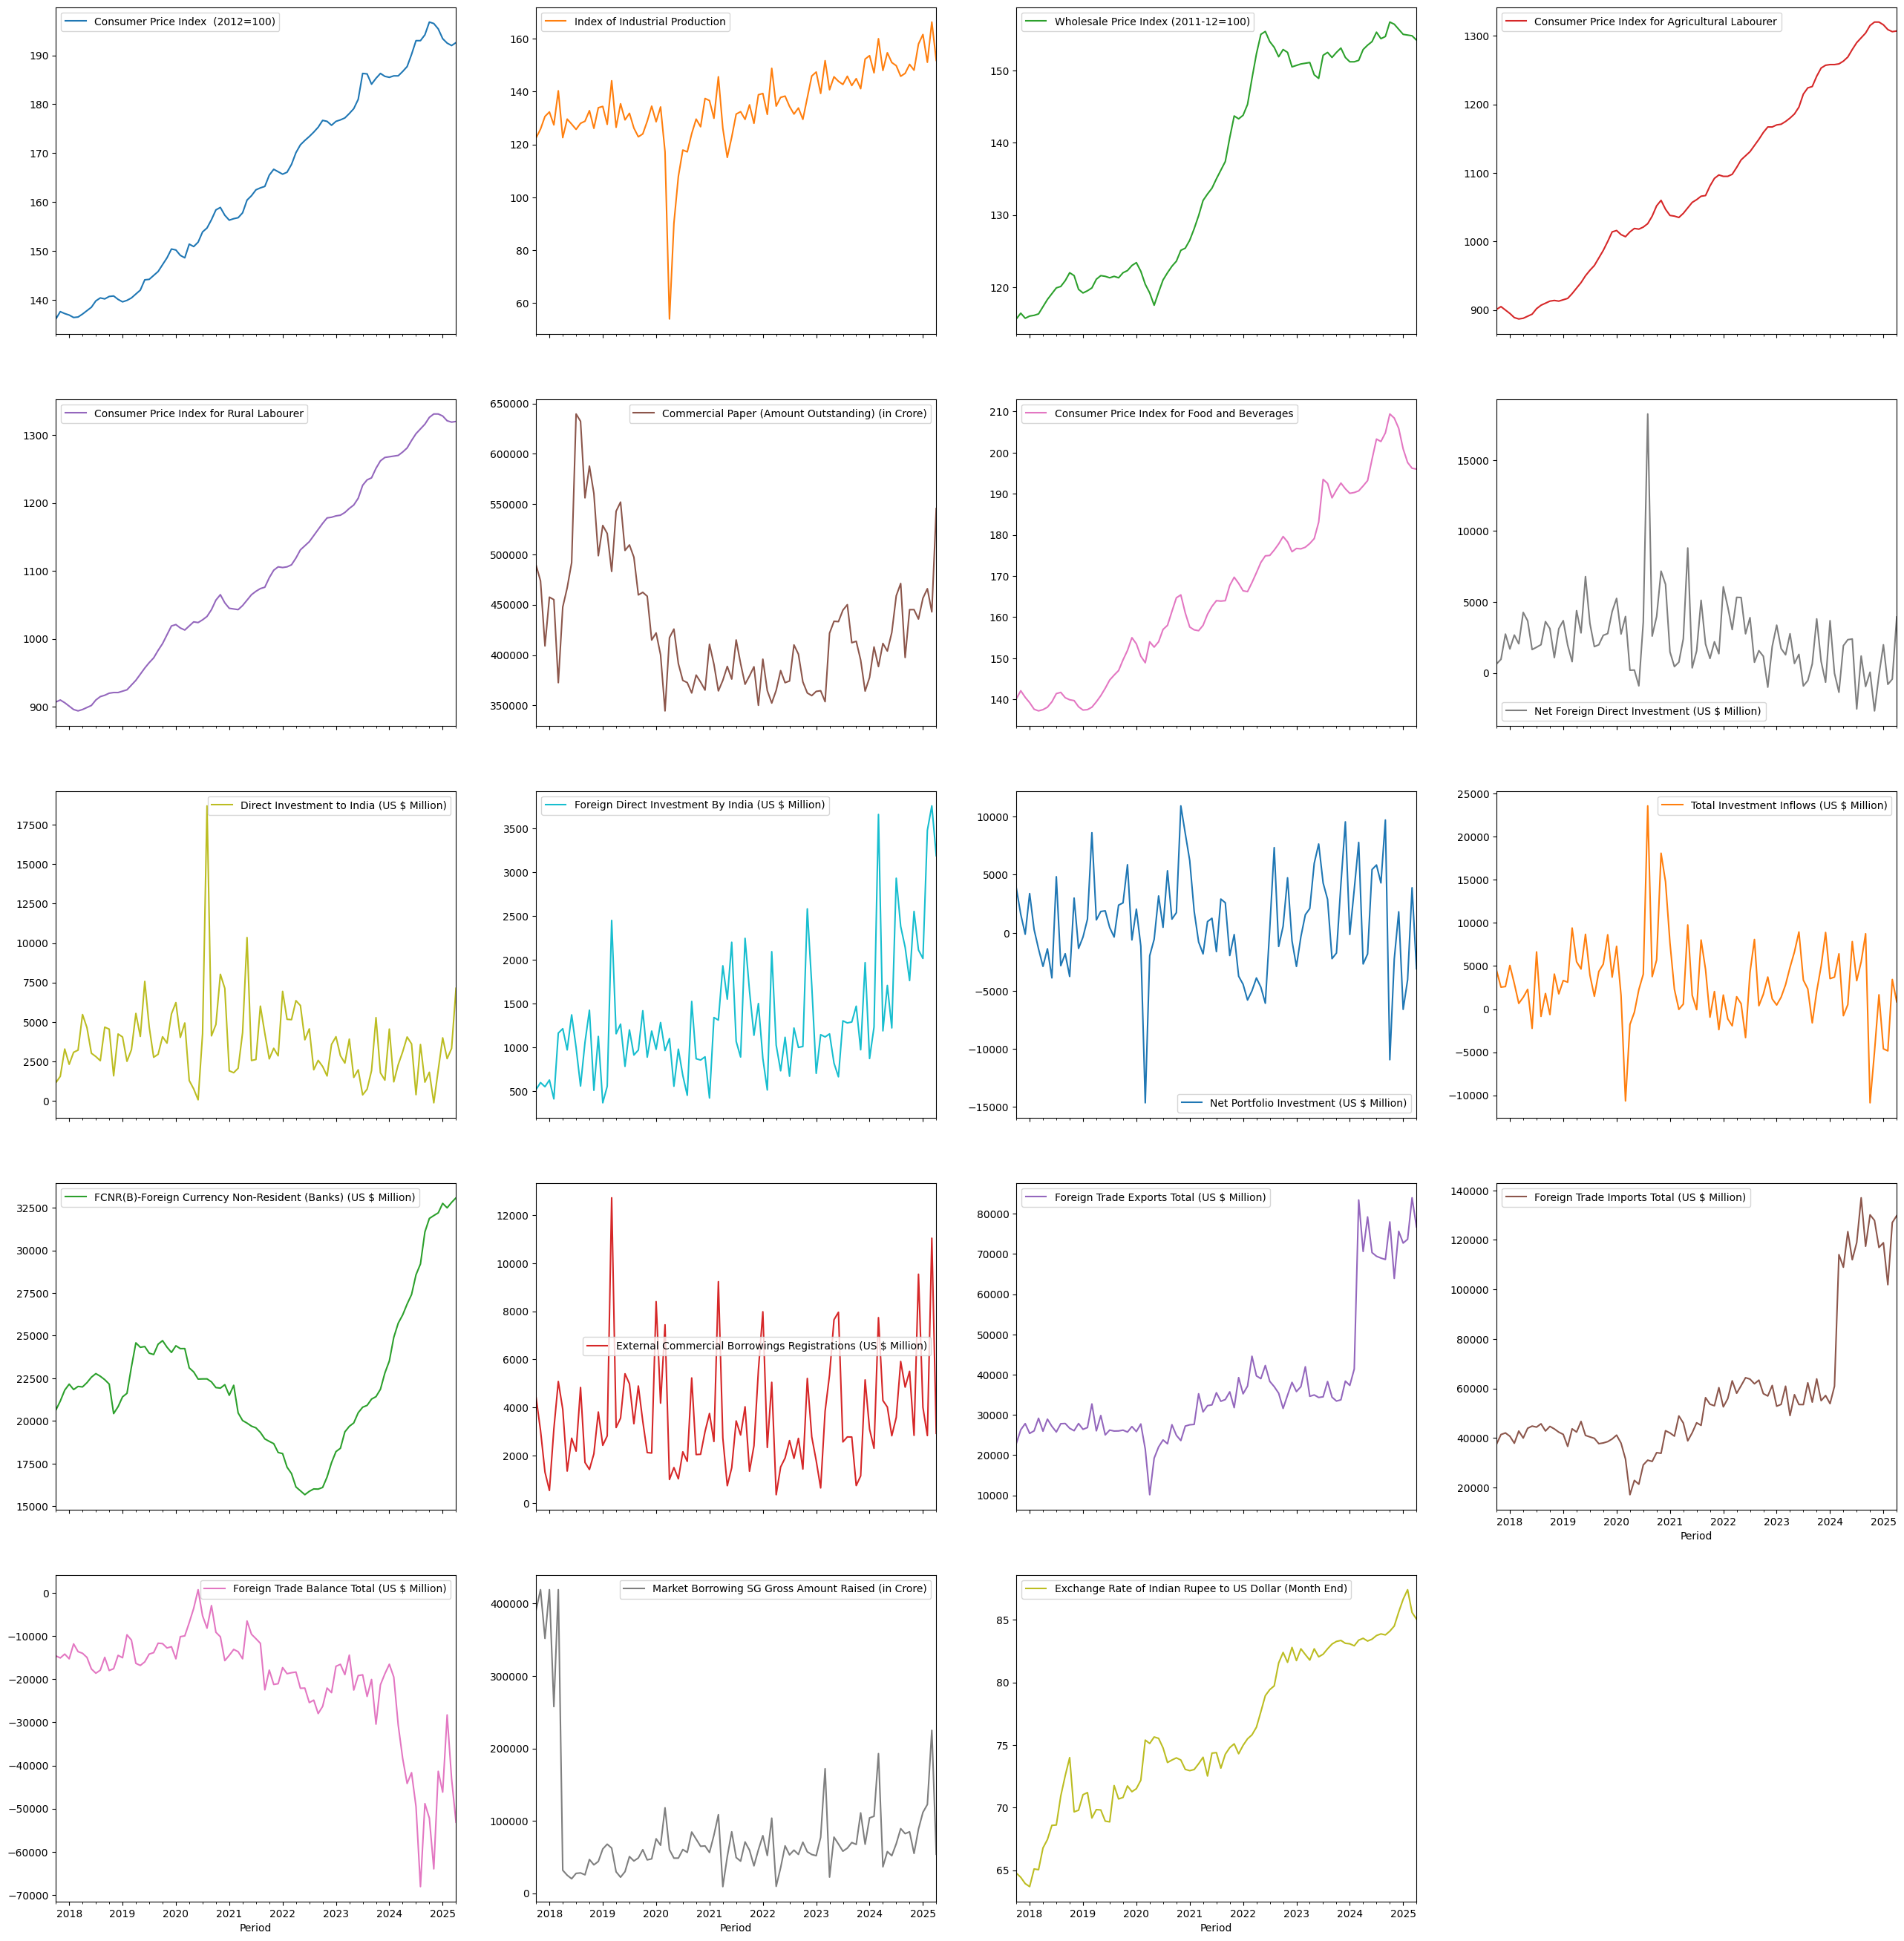

In [5]:
df.plot(kind='line', subplots=True, layout=(6, 4), figsize=(32, 40))

In [6]:
#scaling features for a better visualization of target variables against other variables (as most of the features in df are of different scale)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

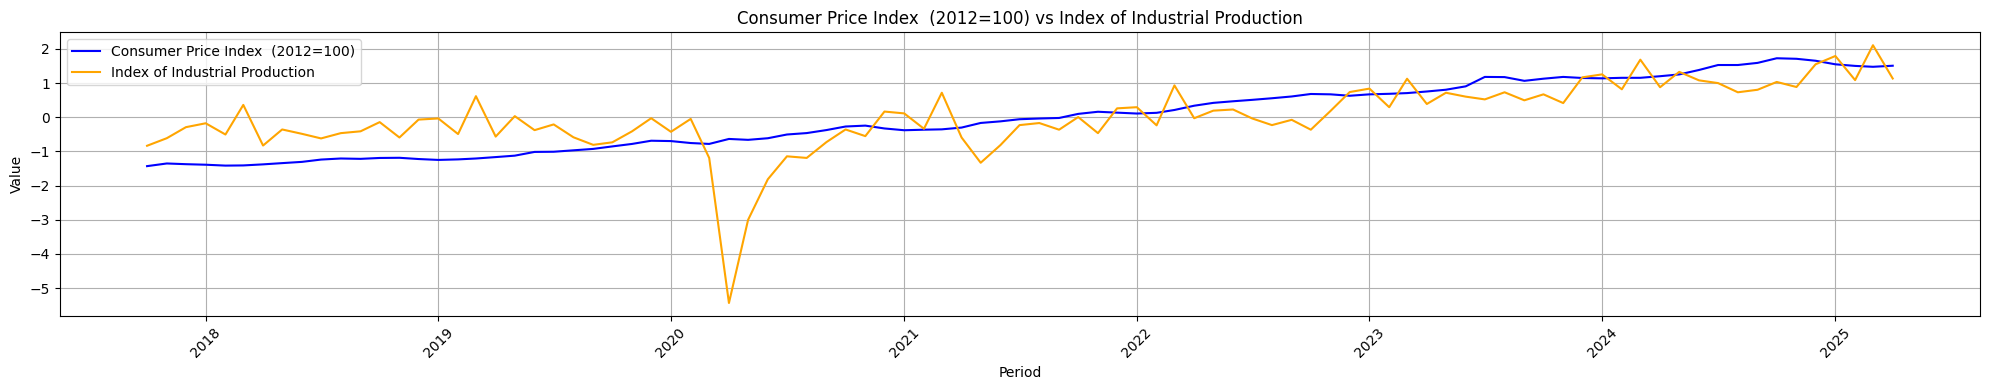

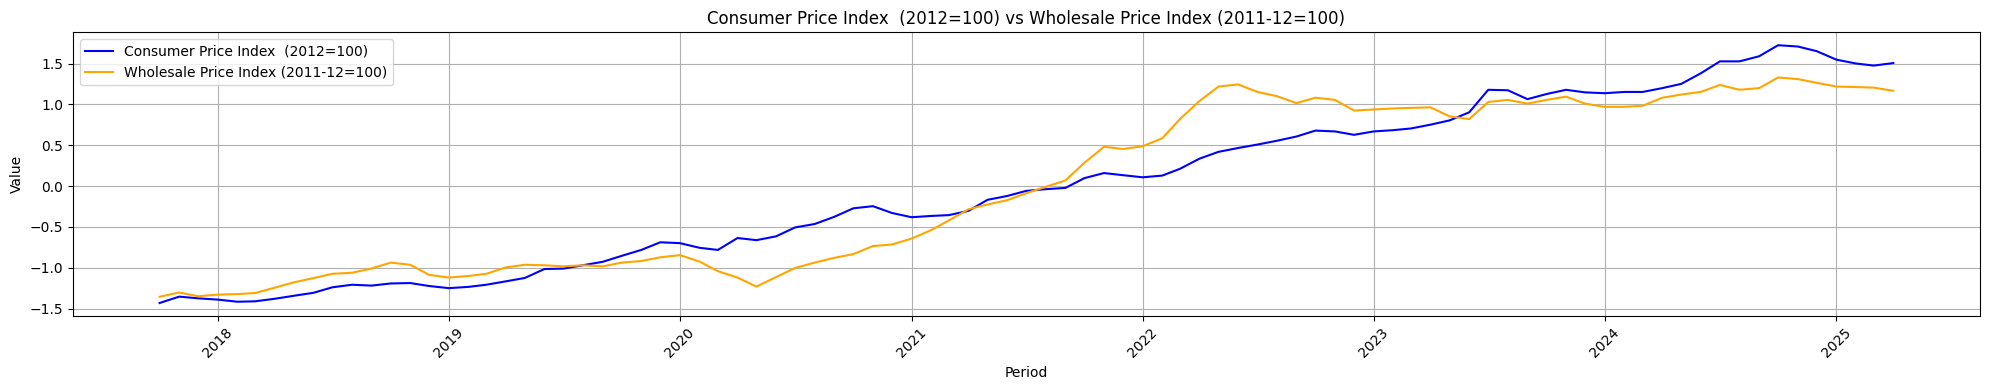

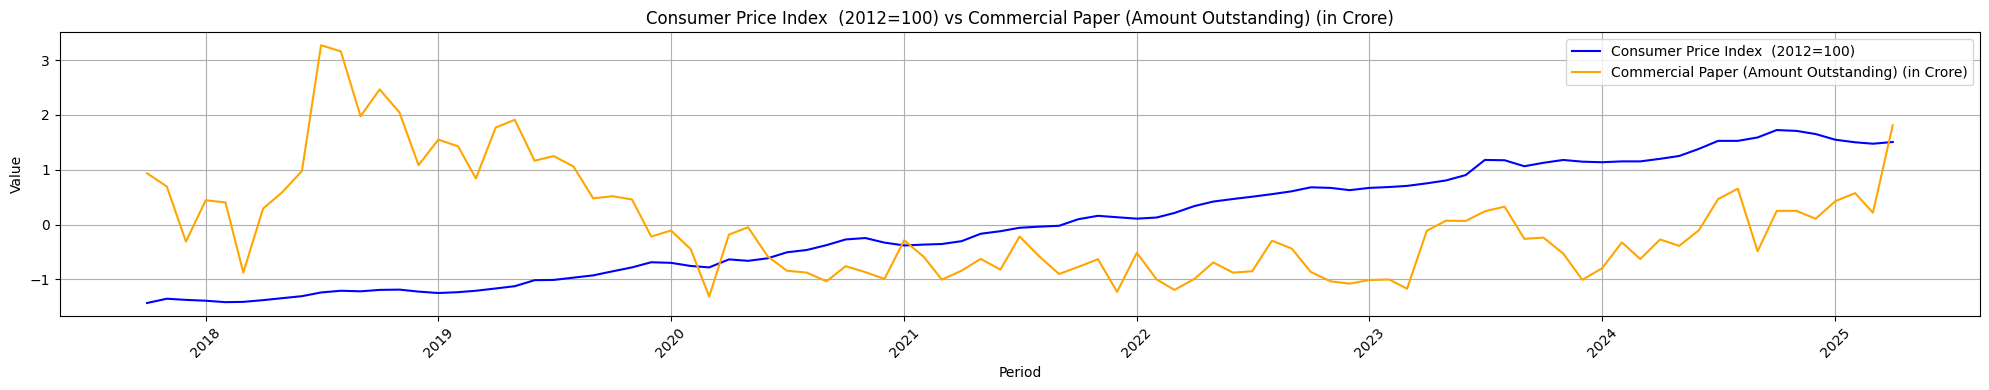

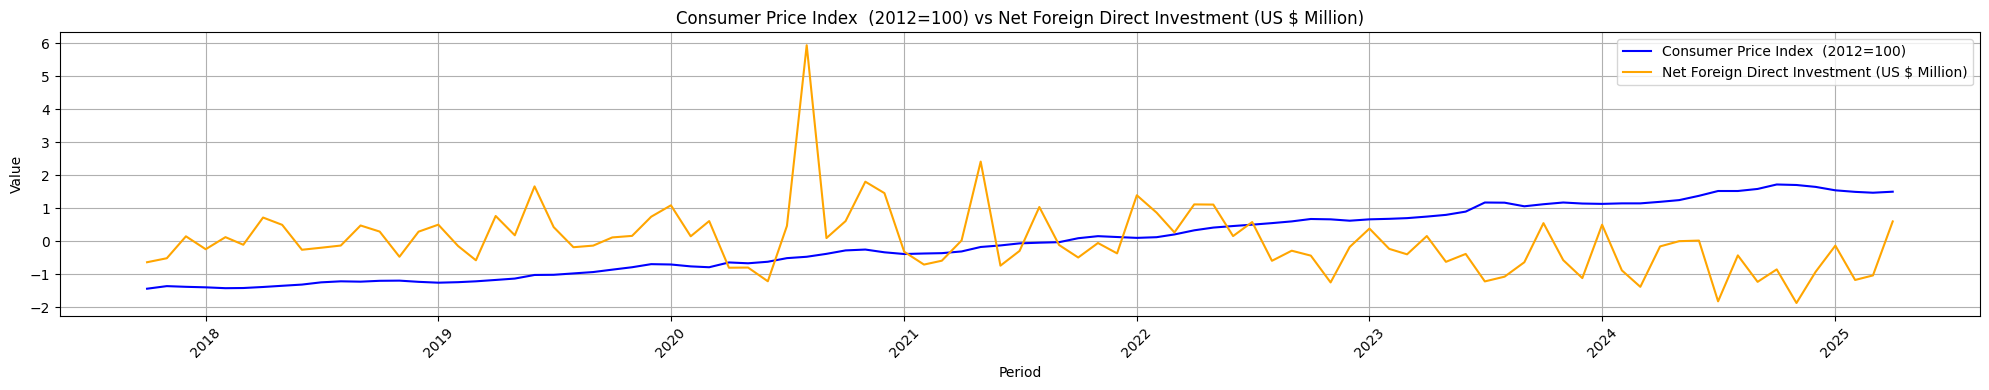

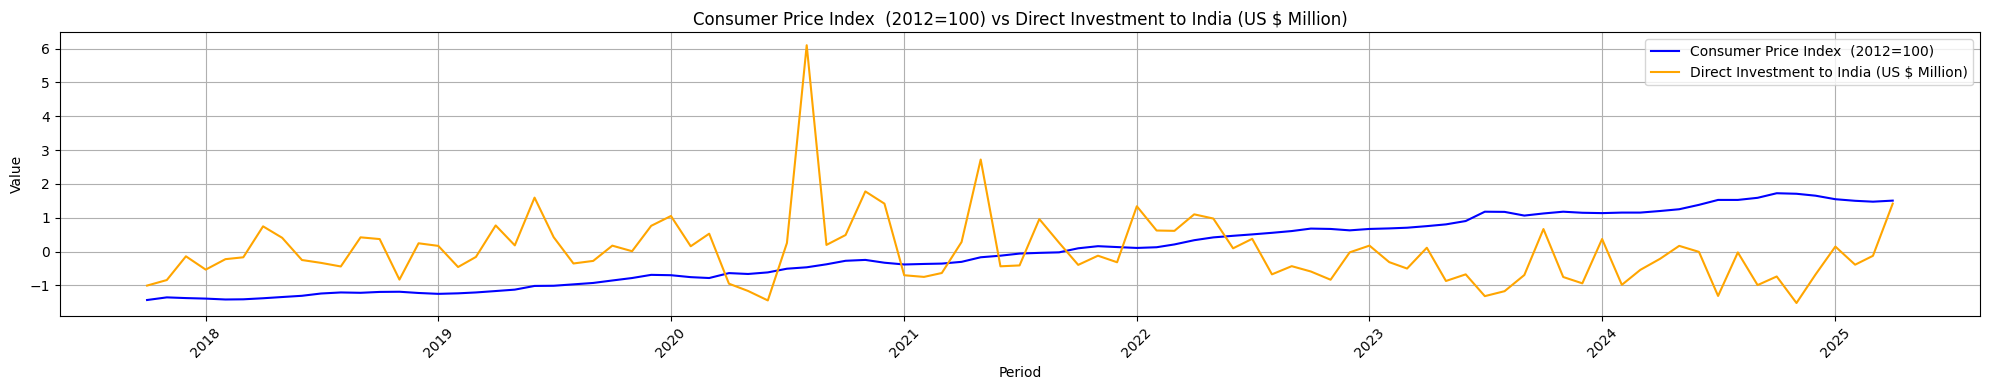

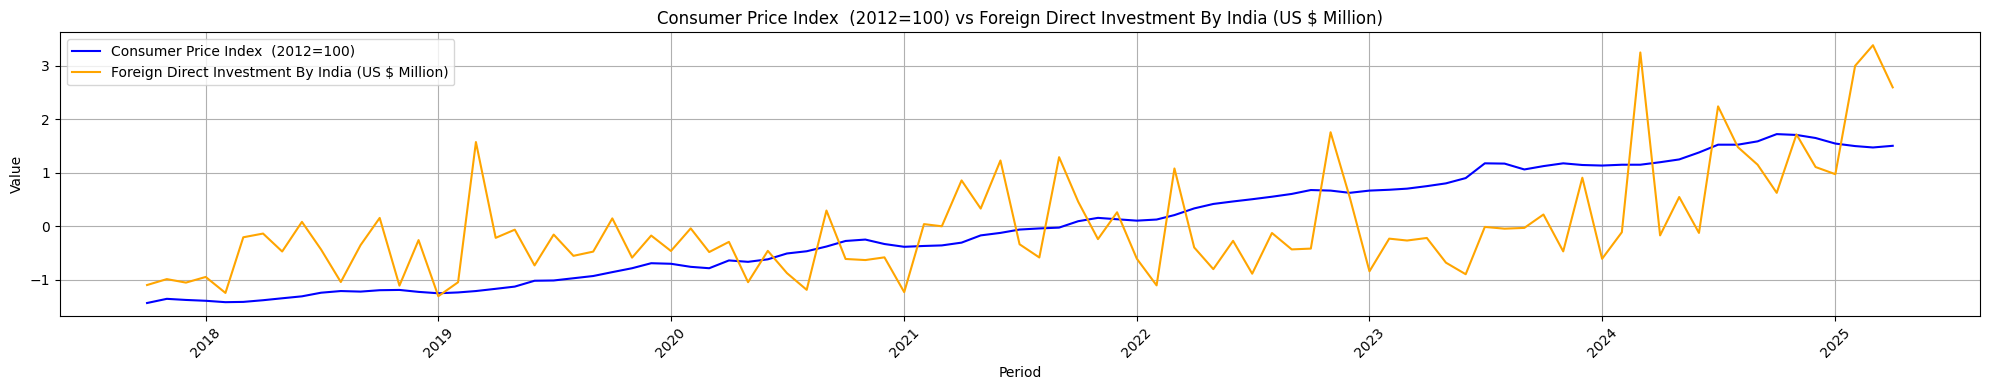

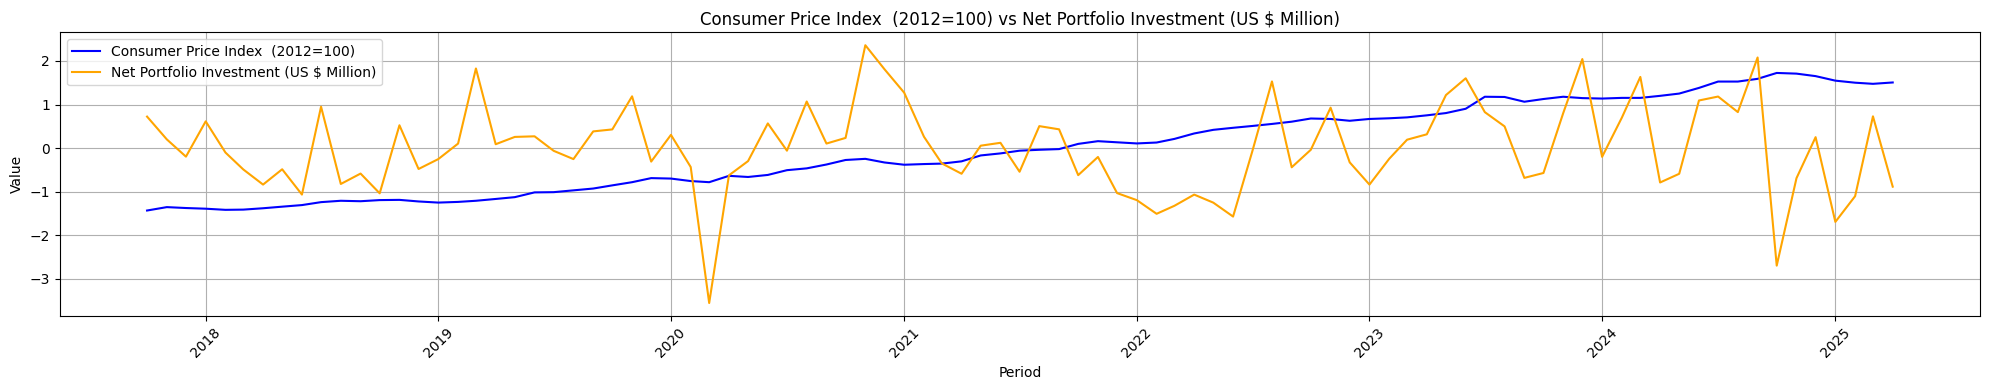

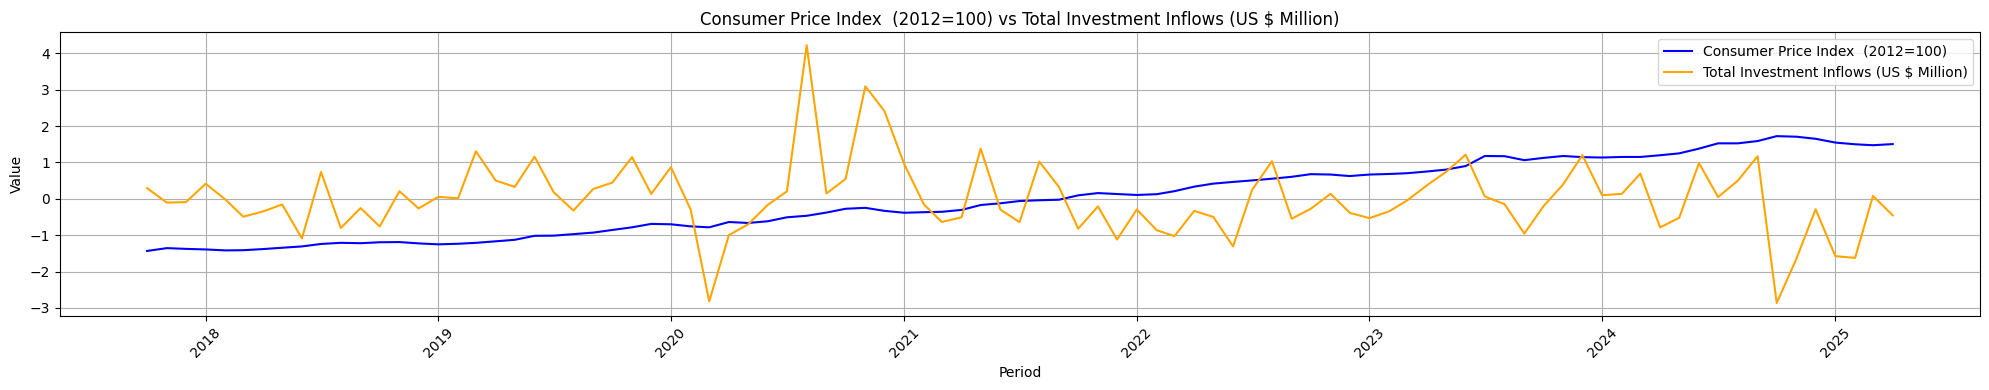

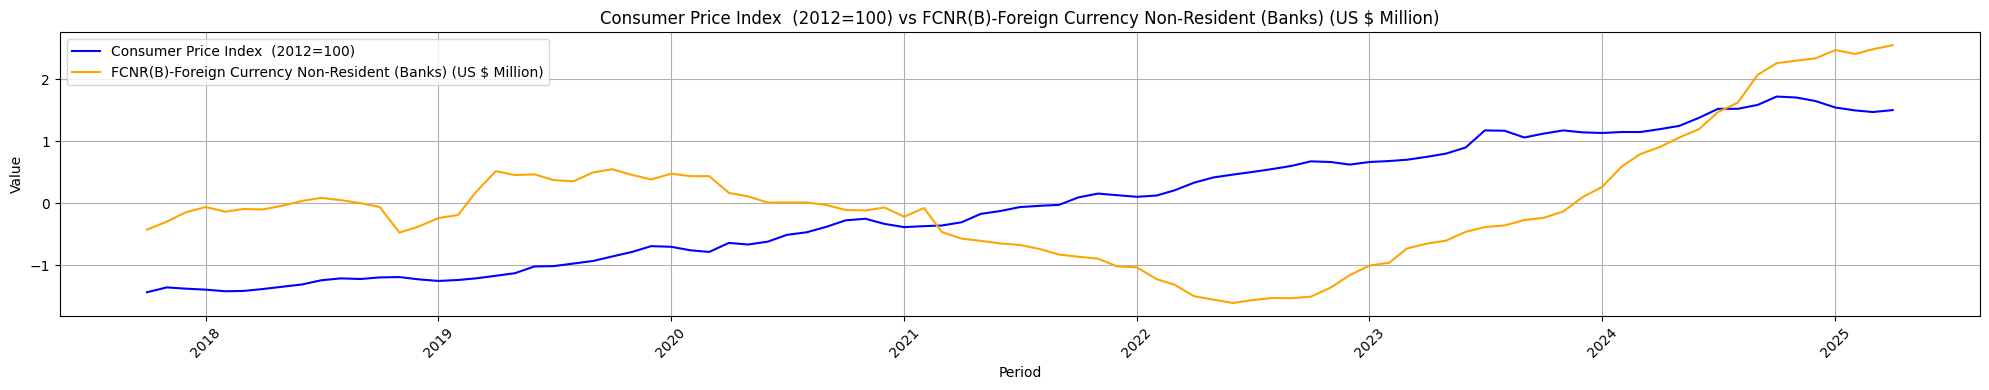

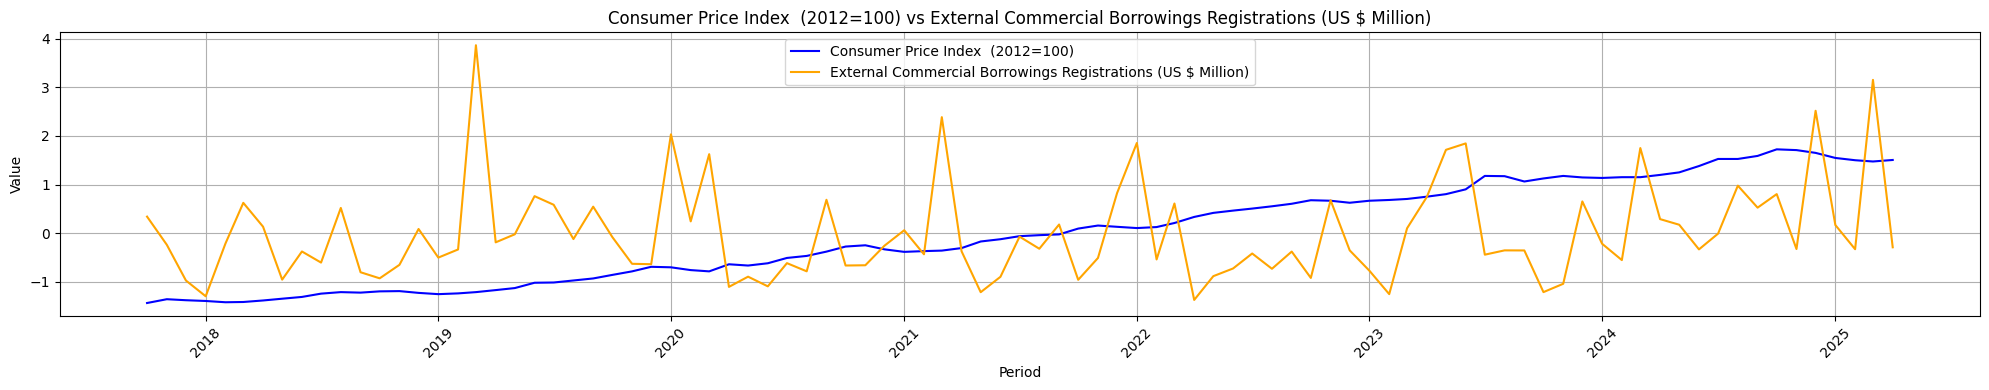

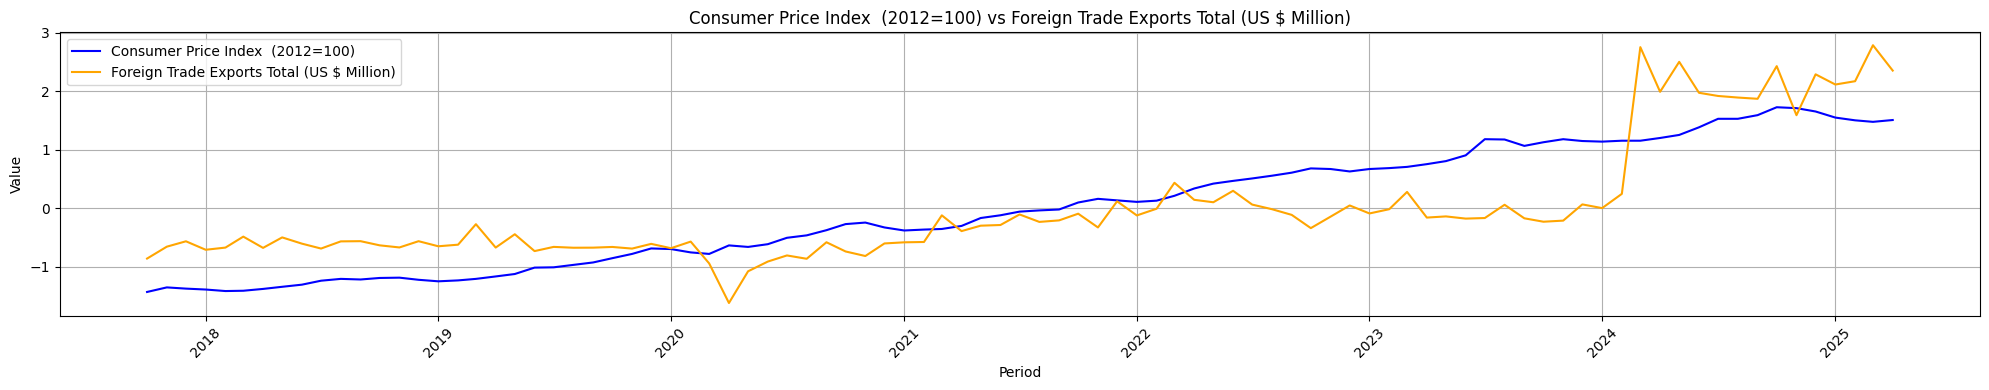

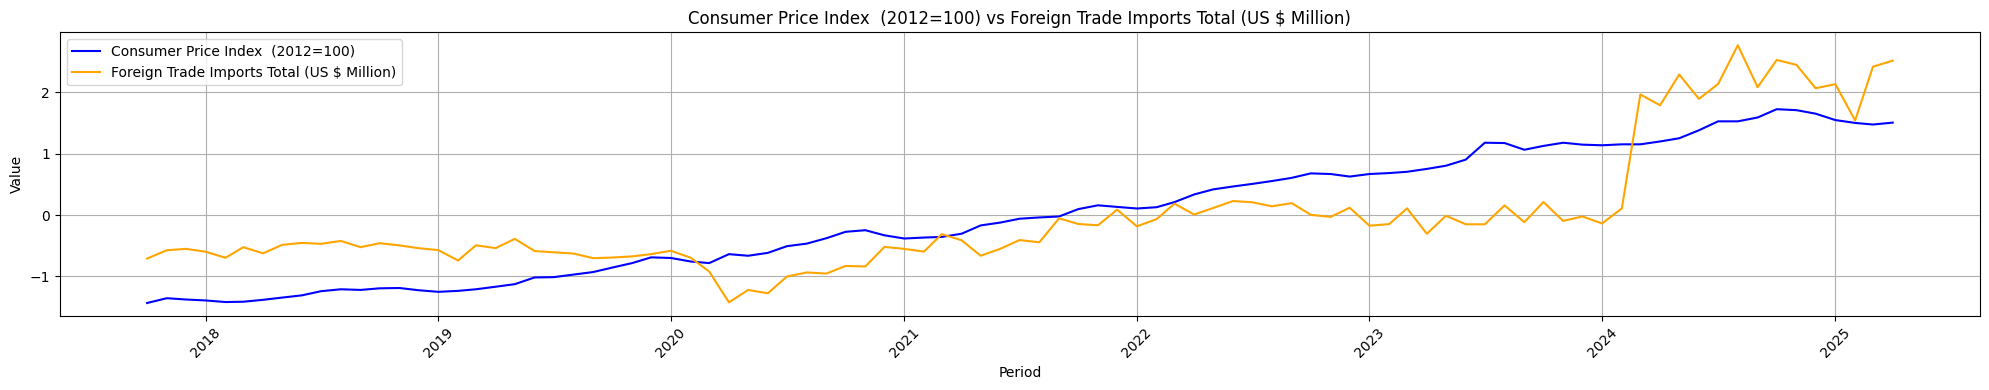

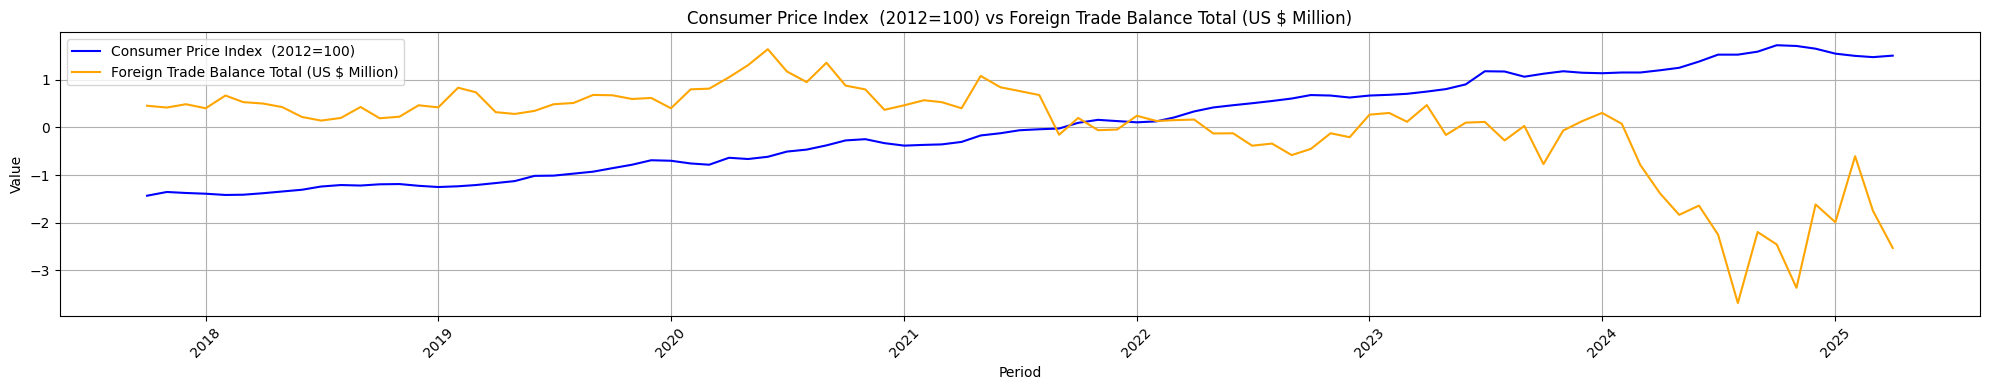

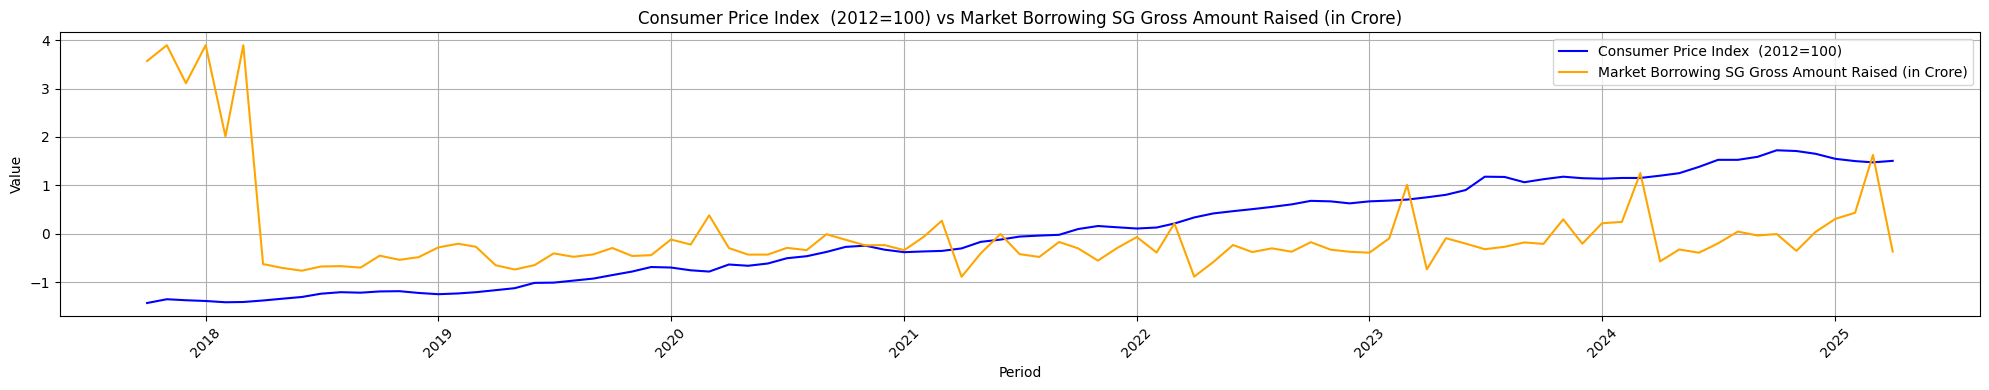

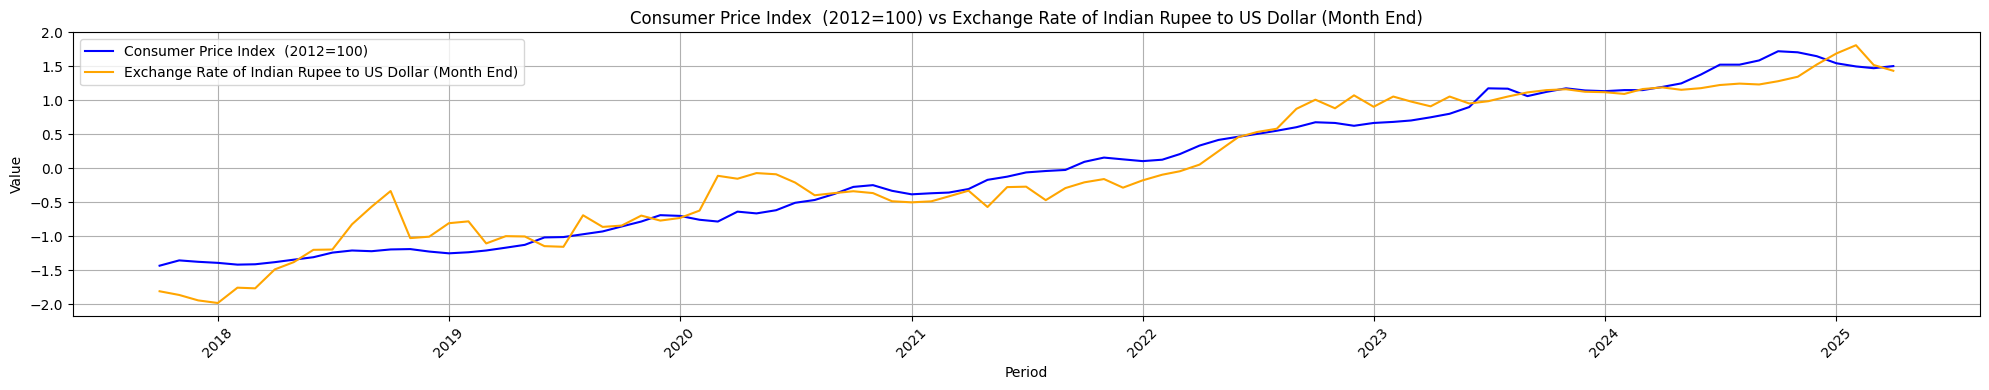

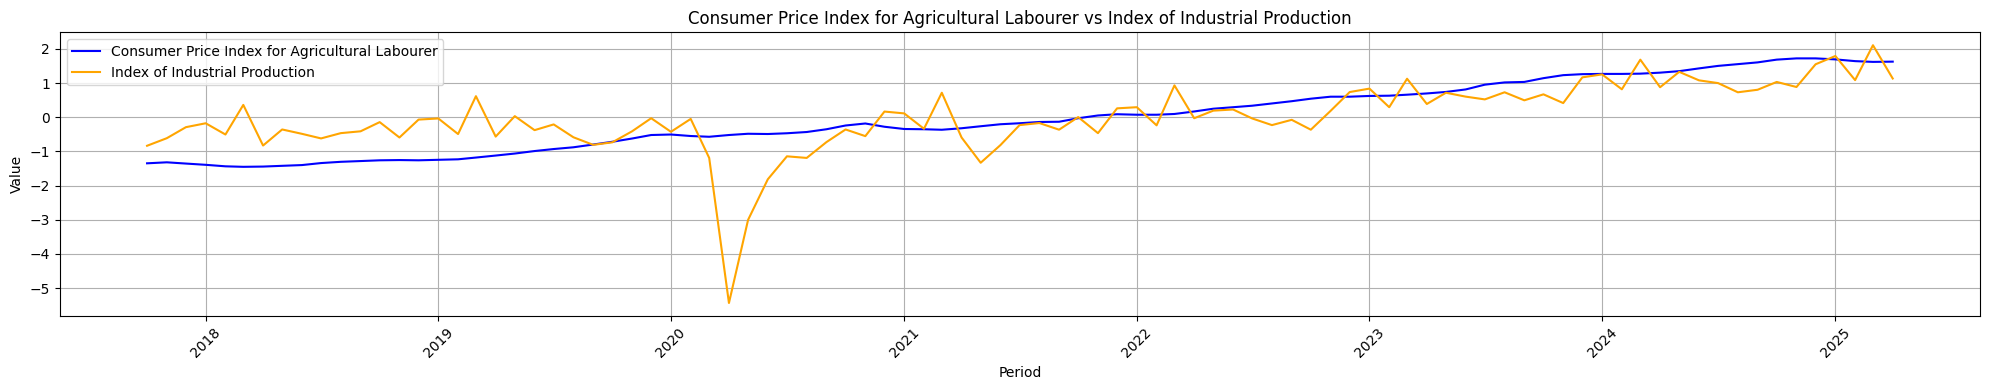

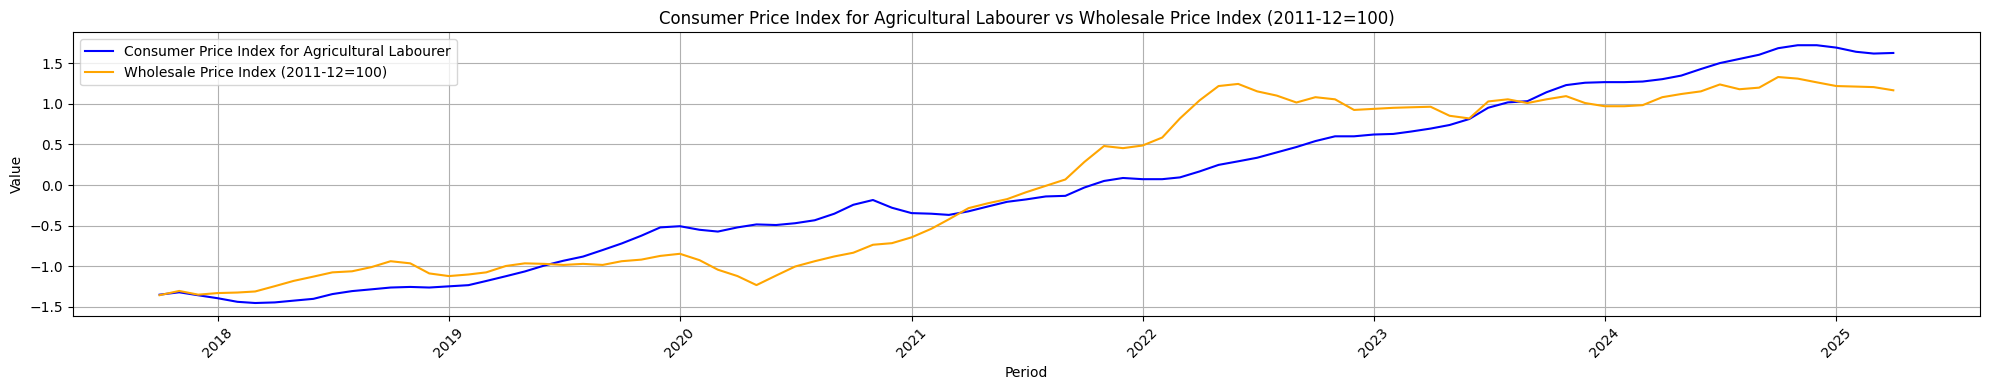

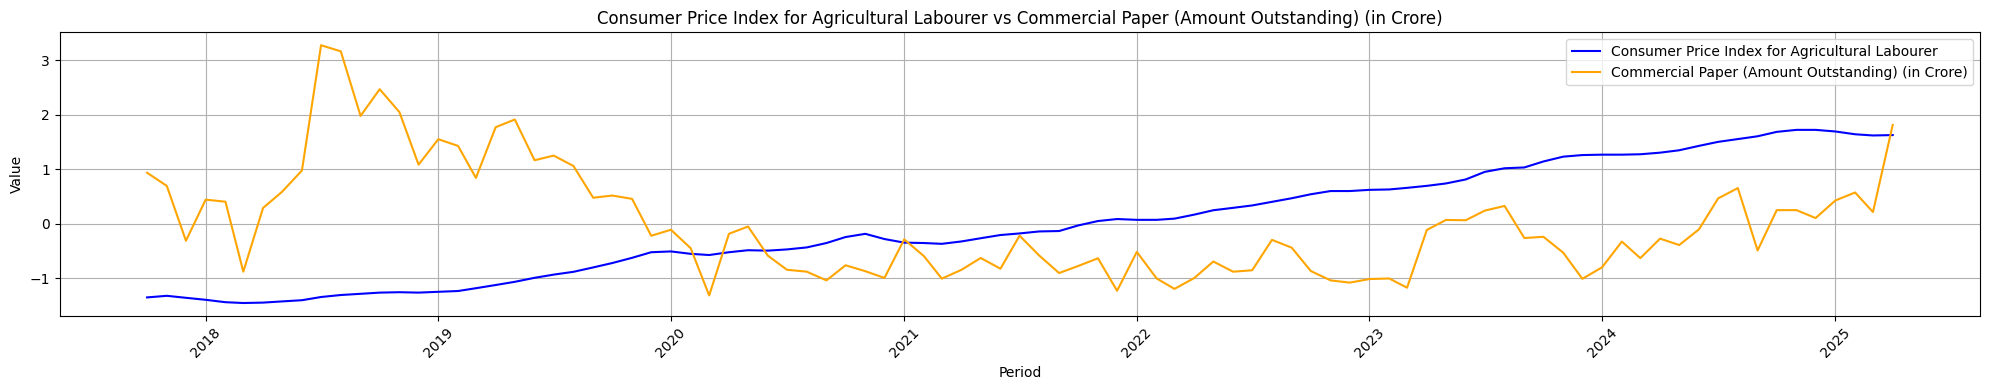

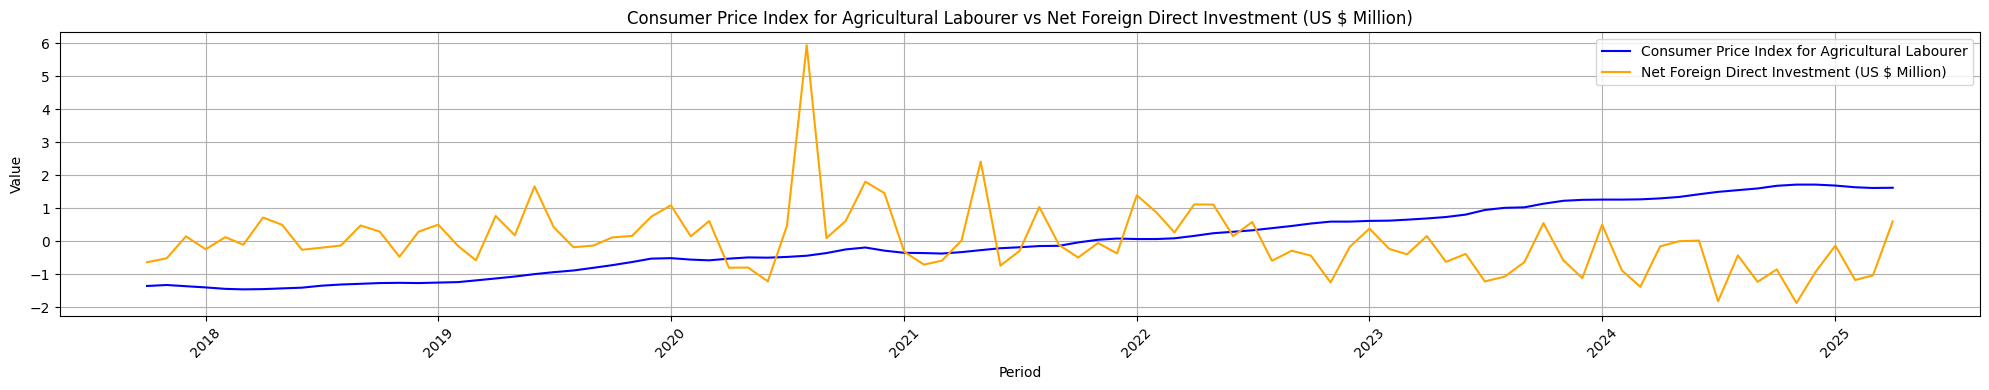

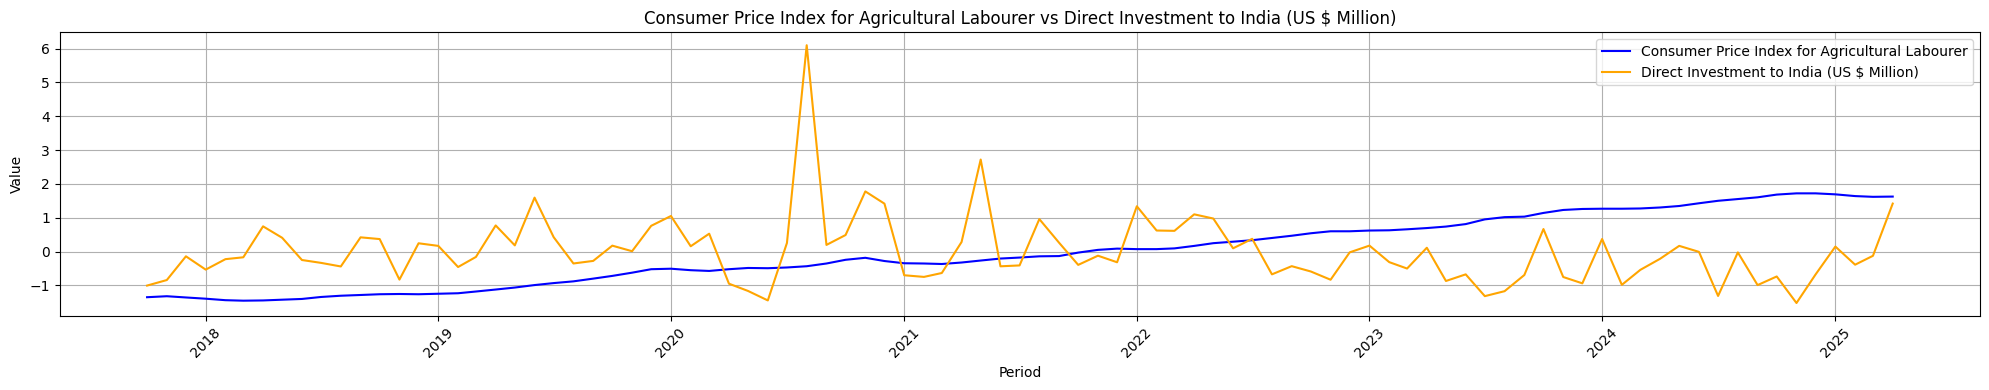

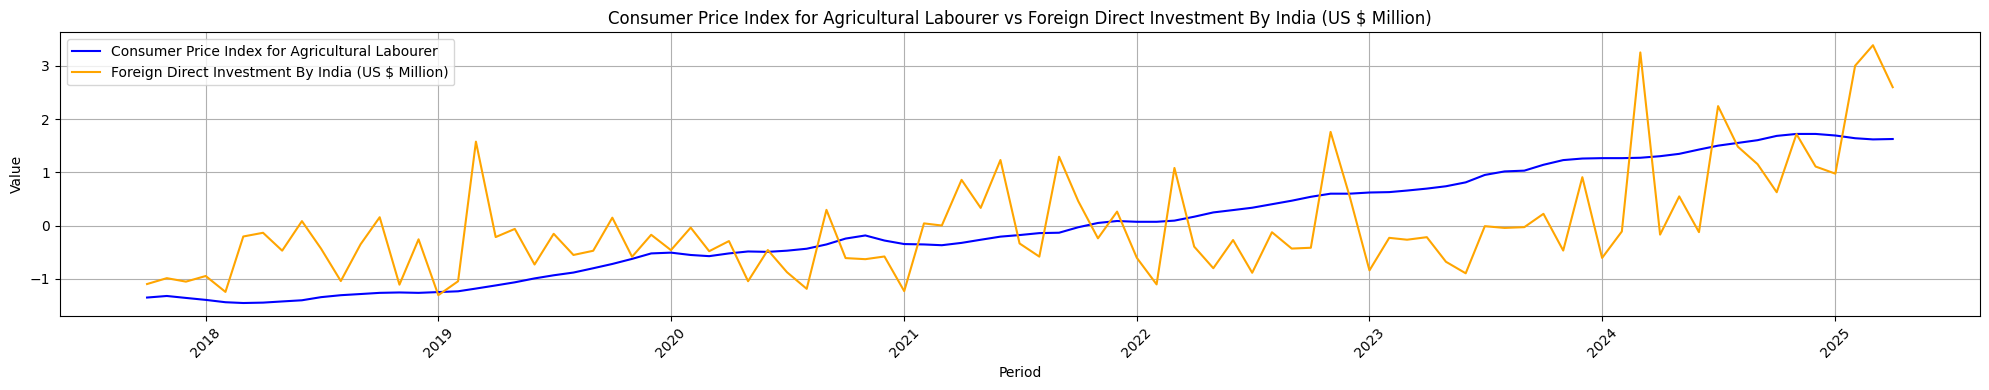

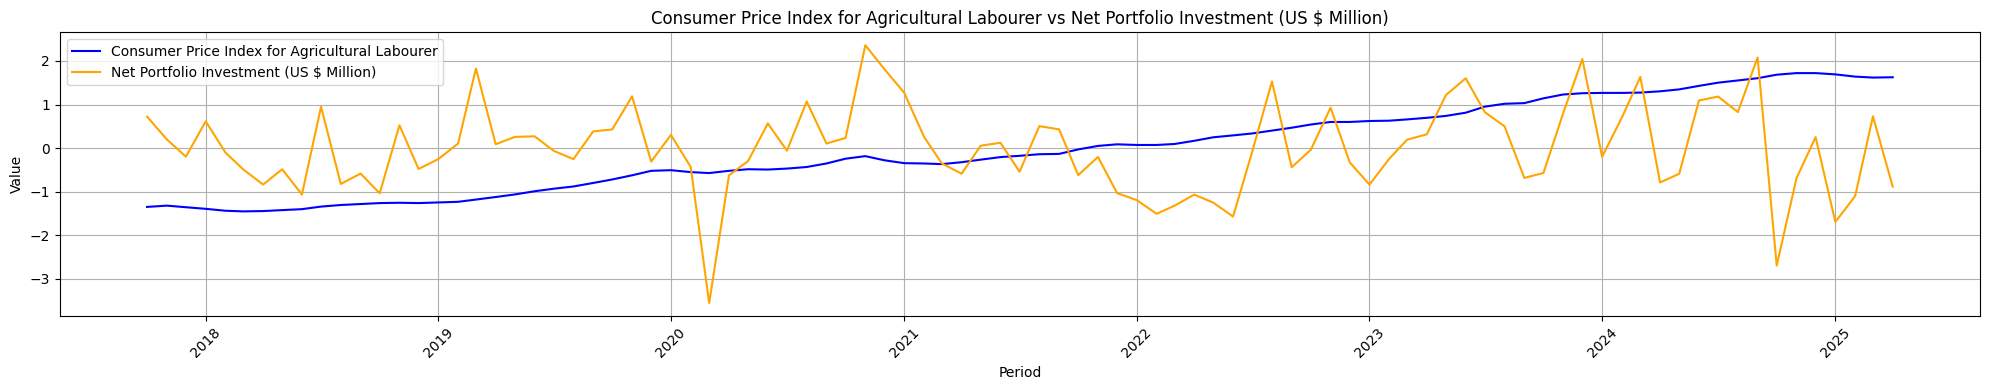

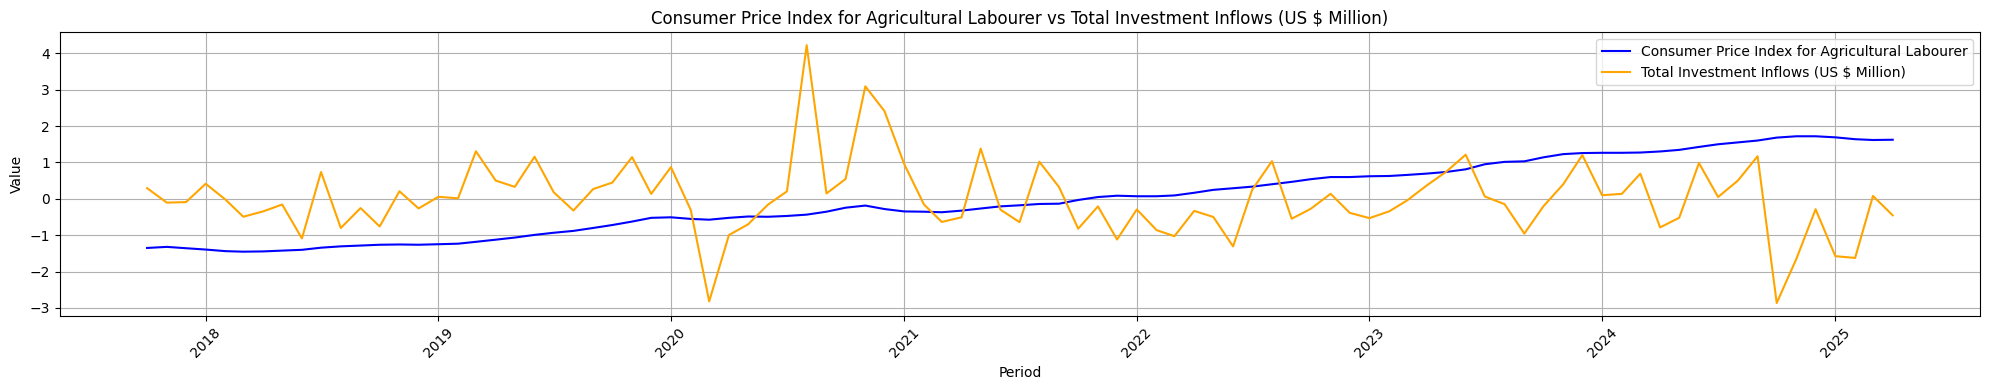

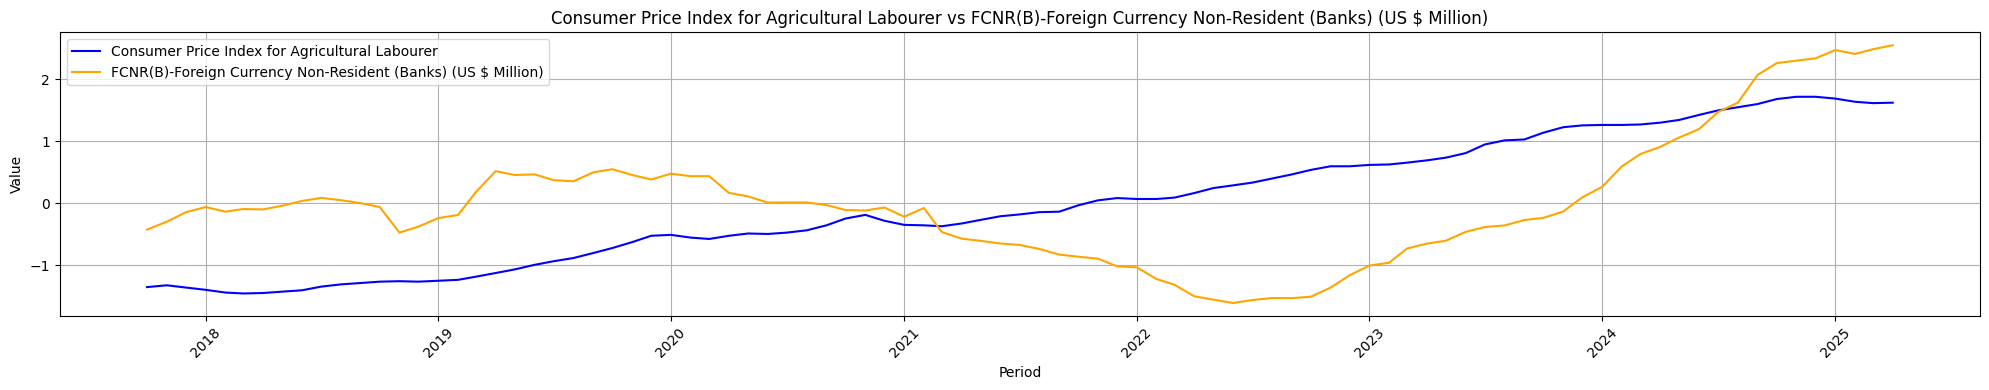

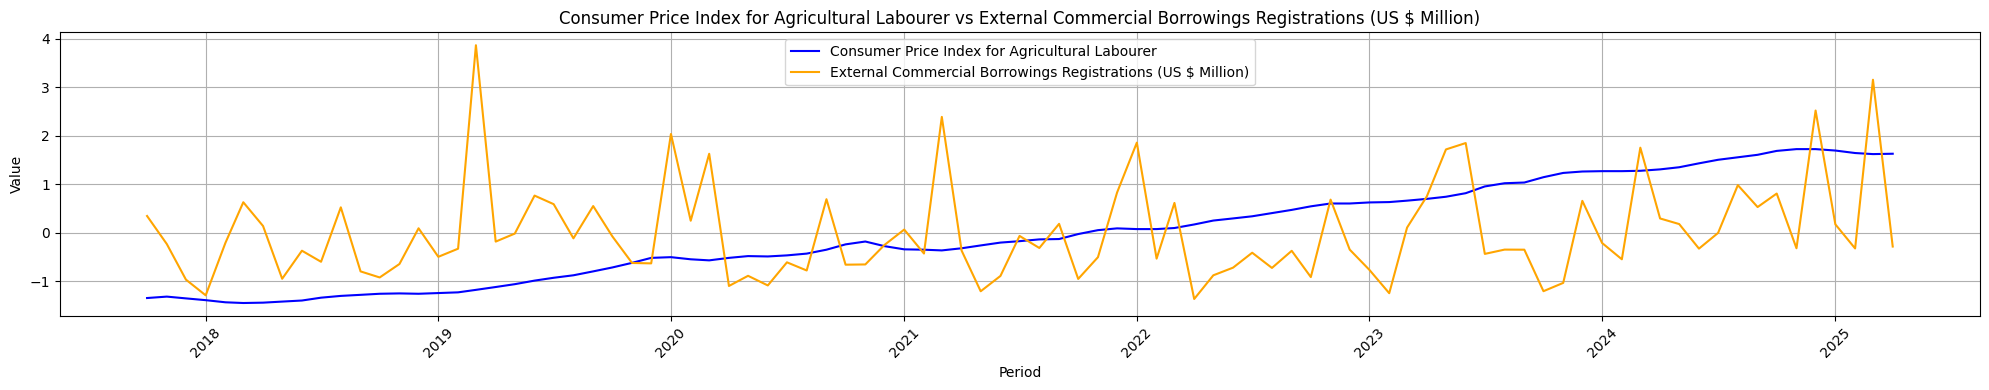

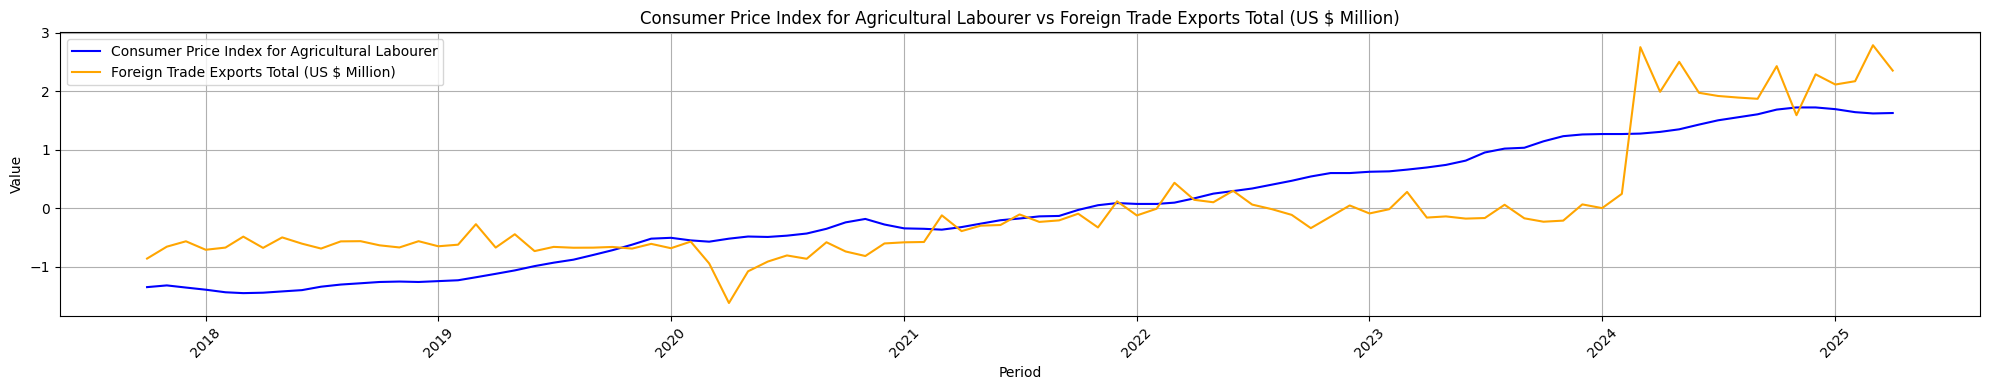

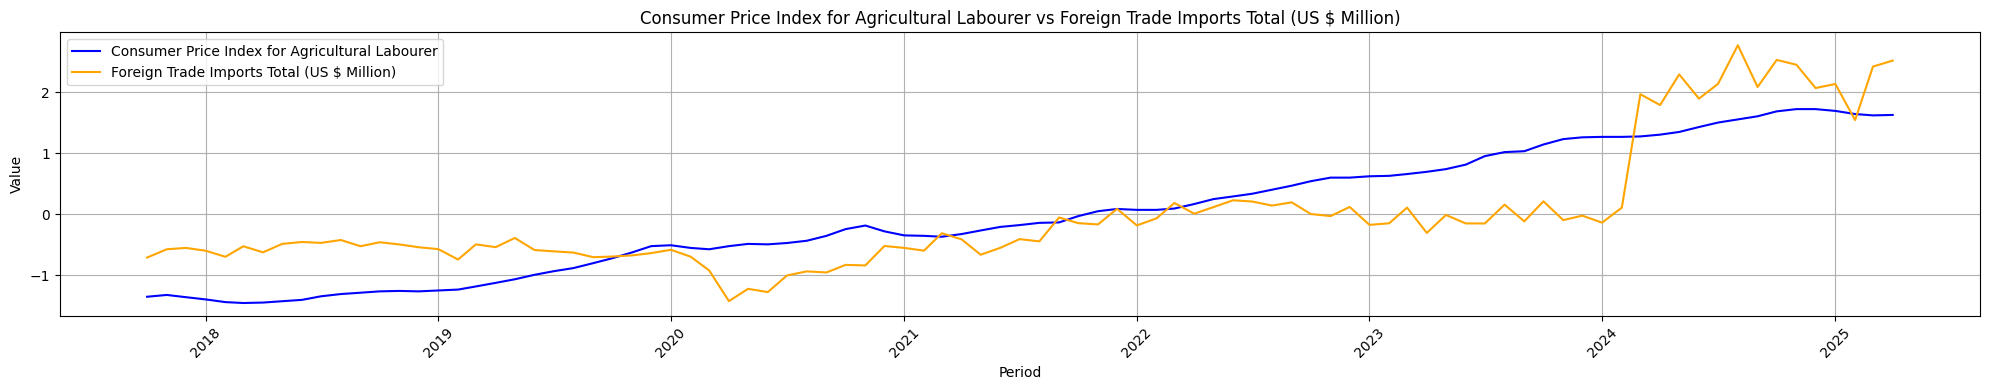

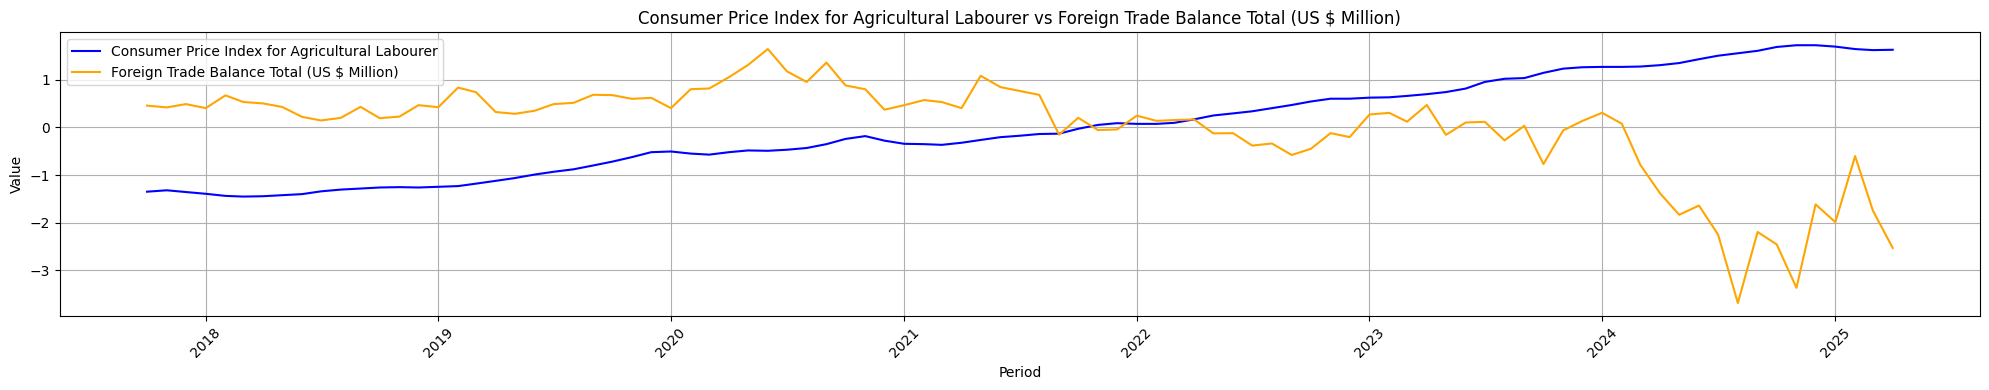

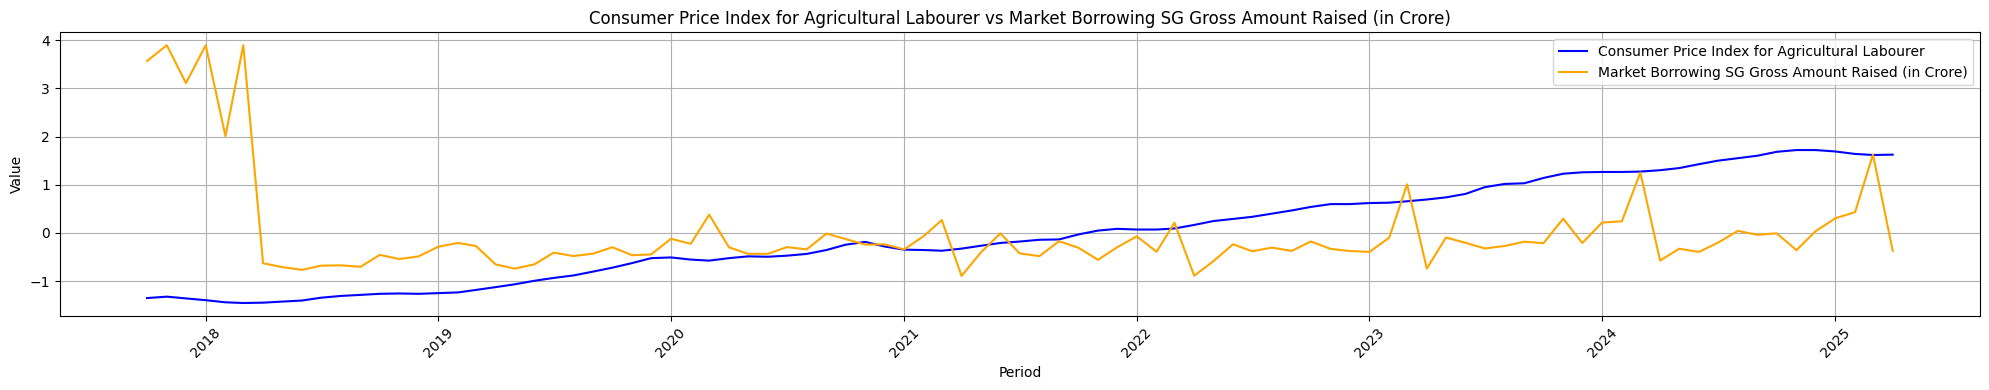

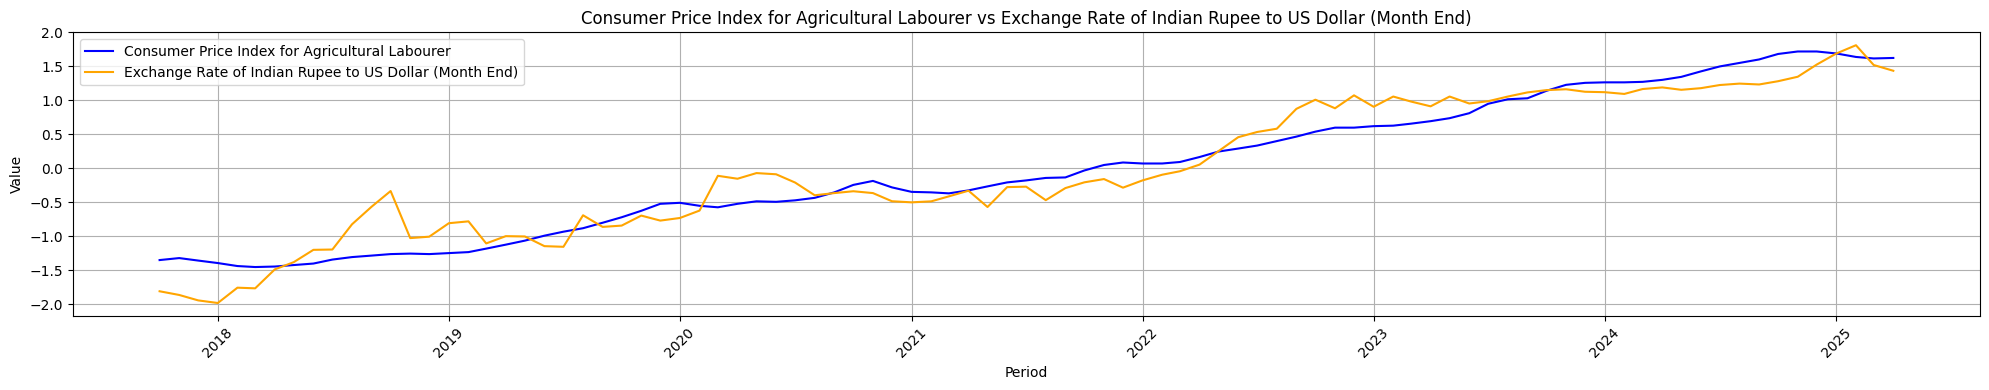

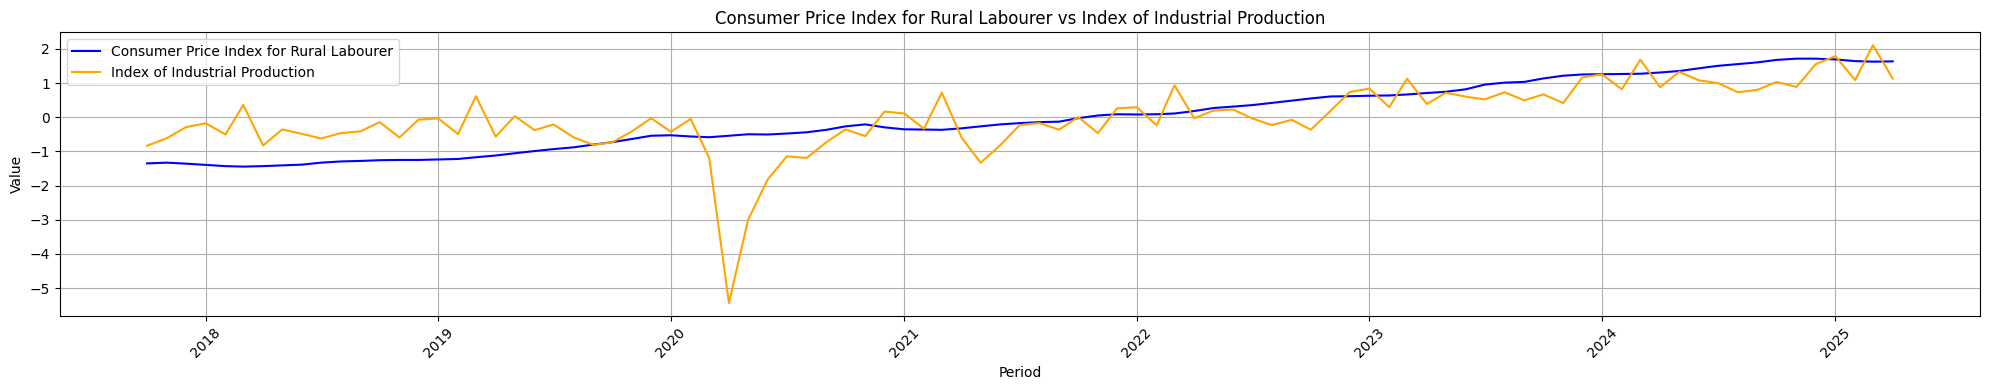

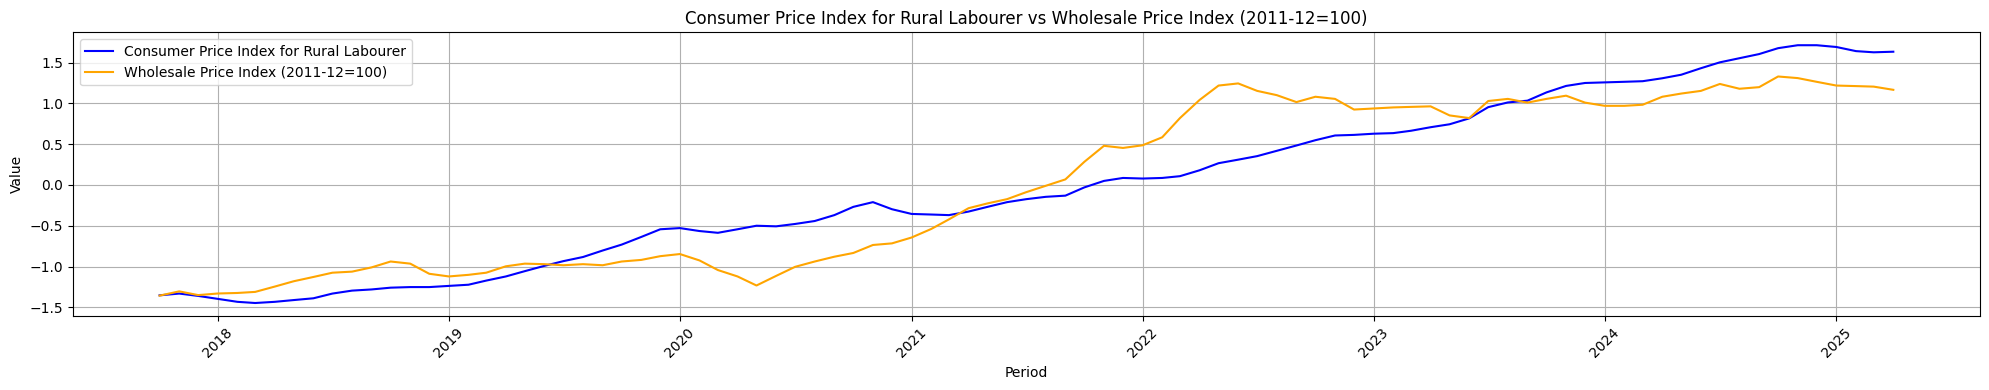

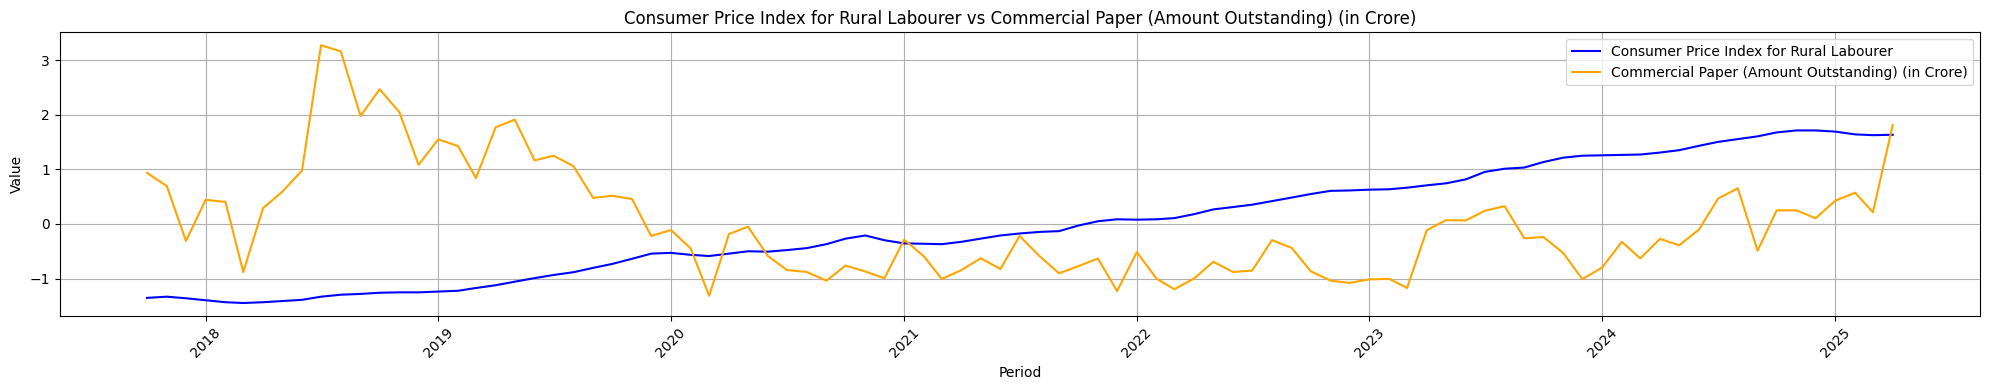

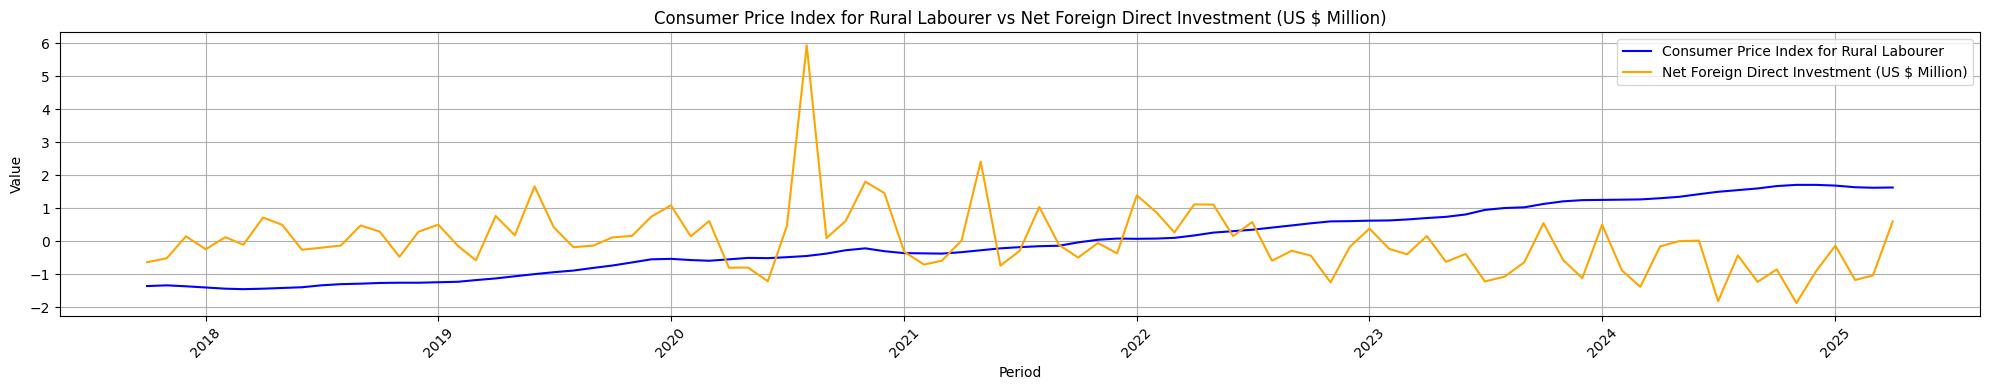

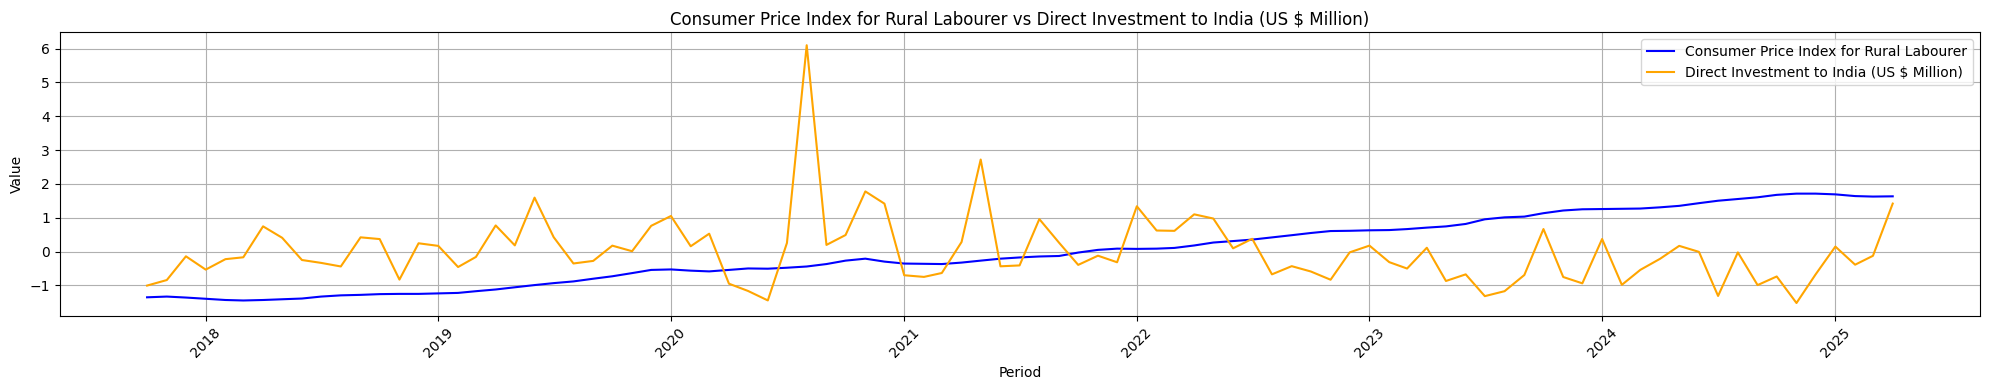

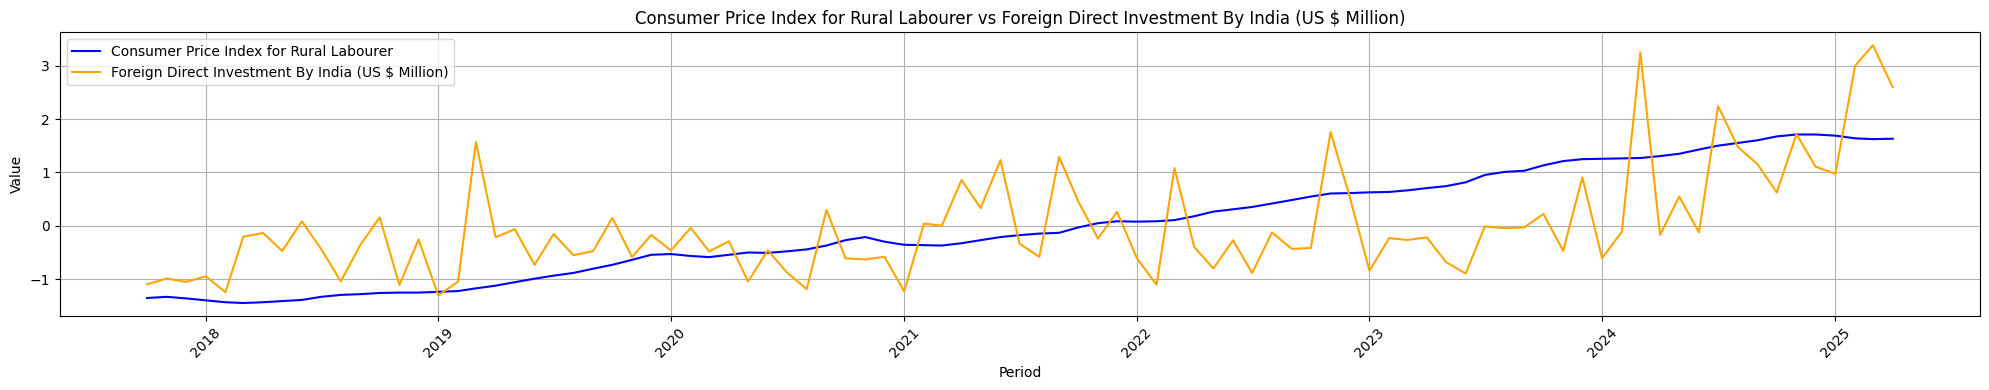

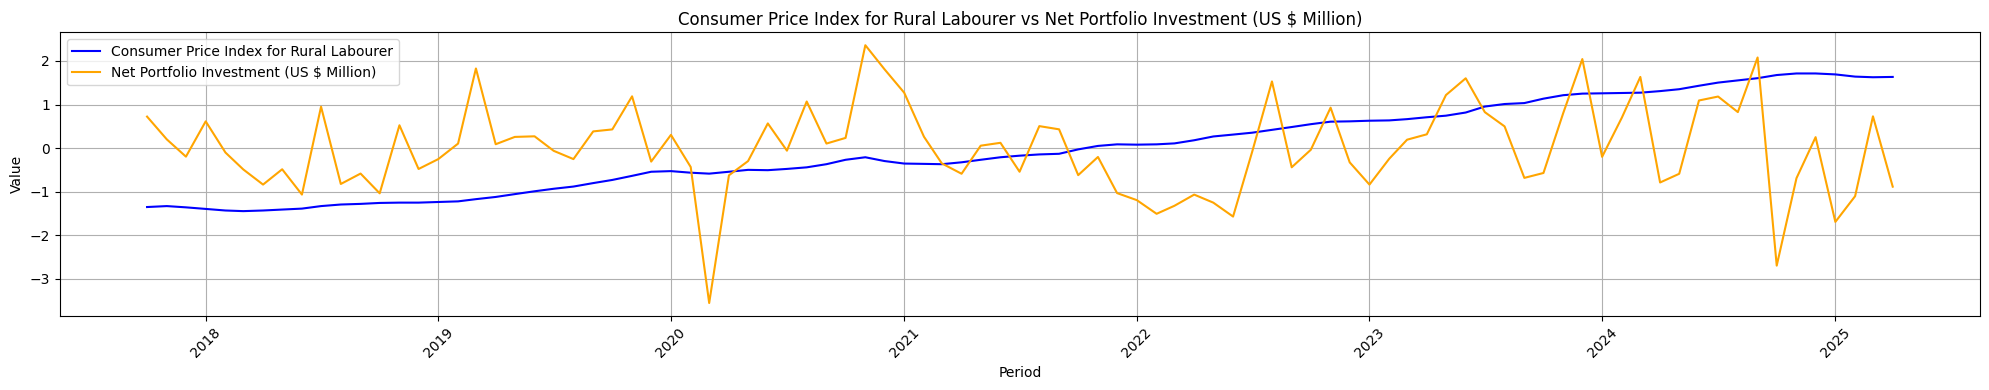

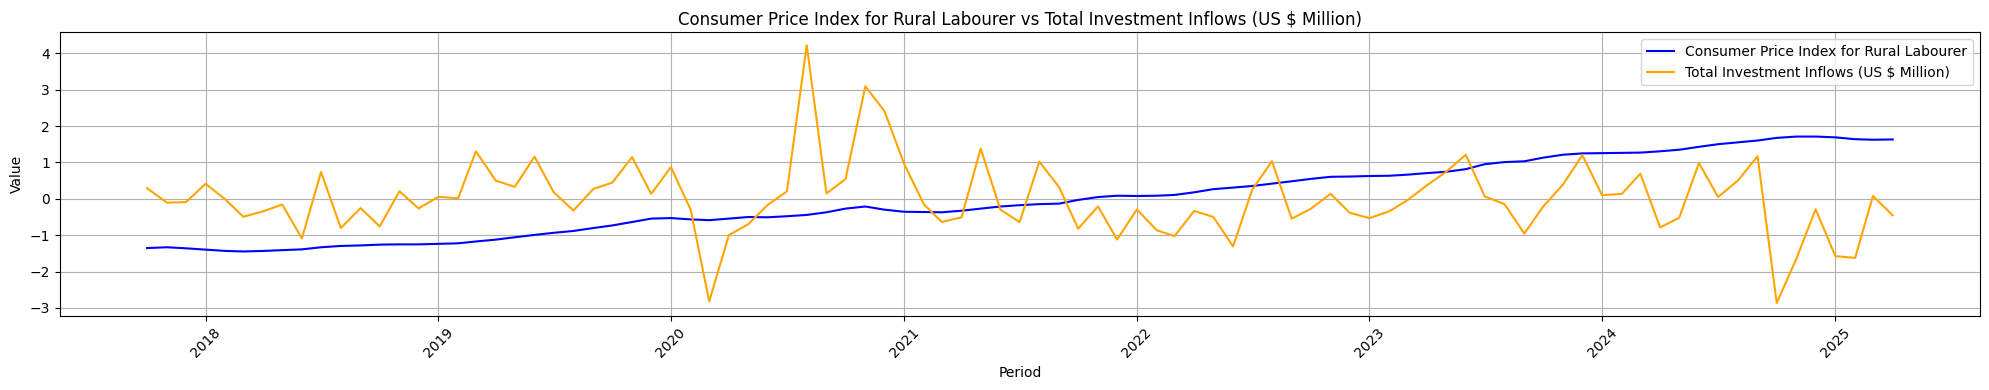

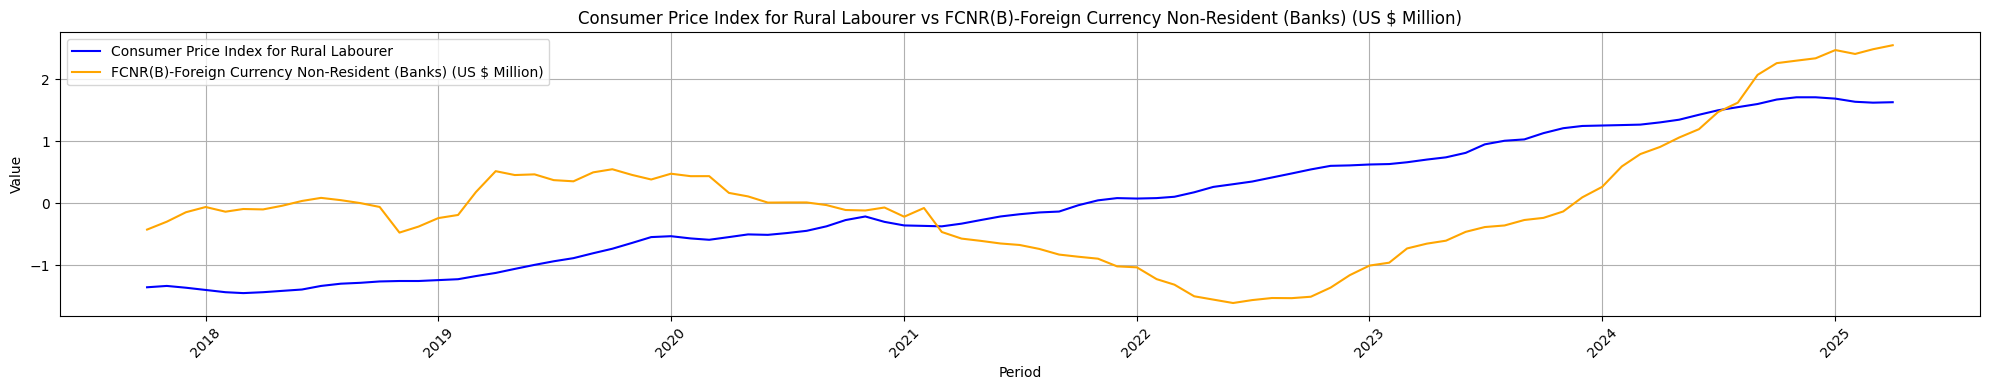

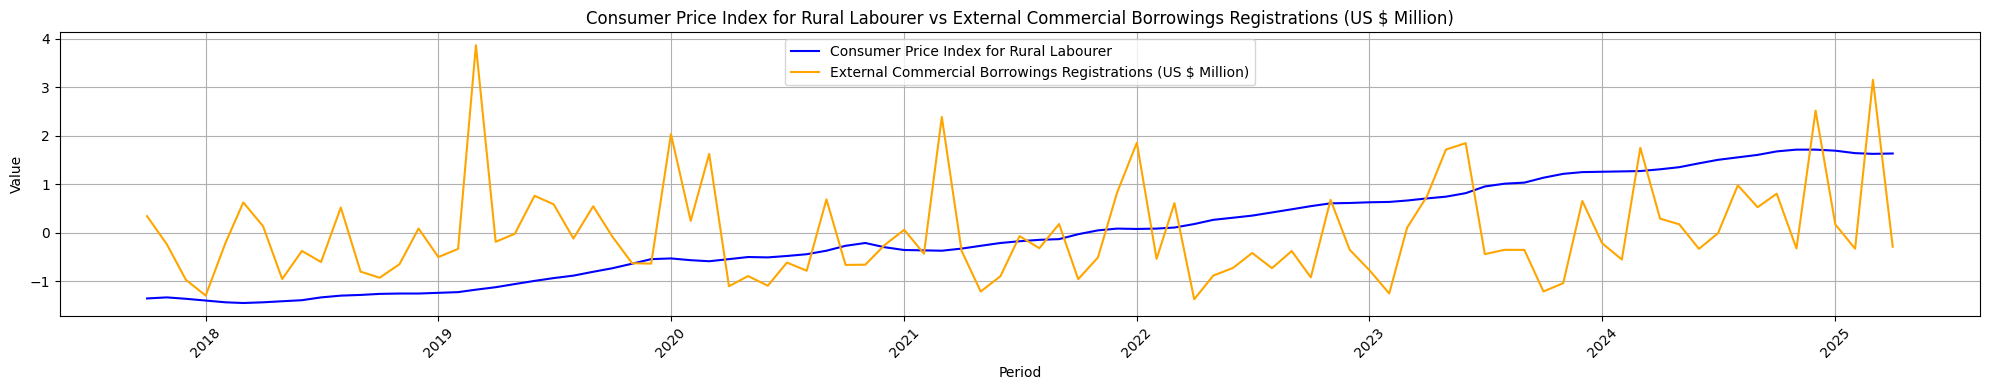

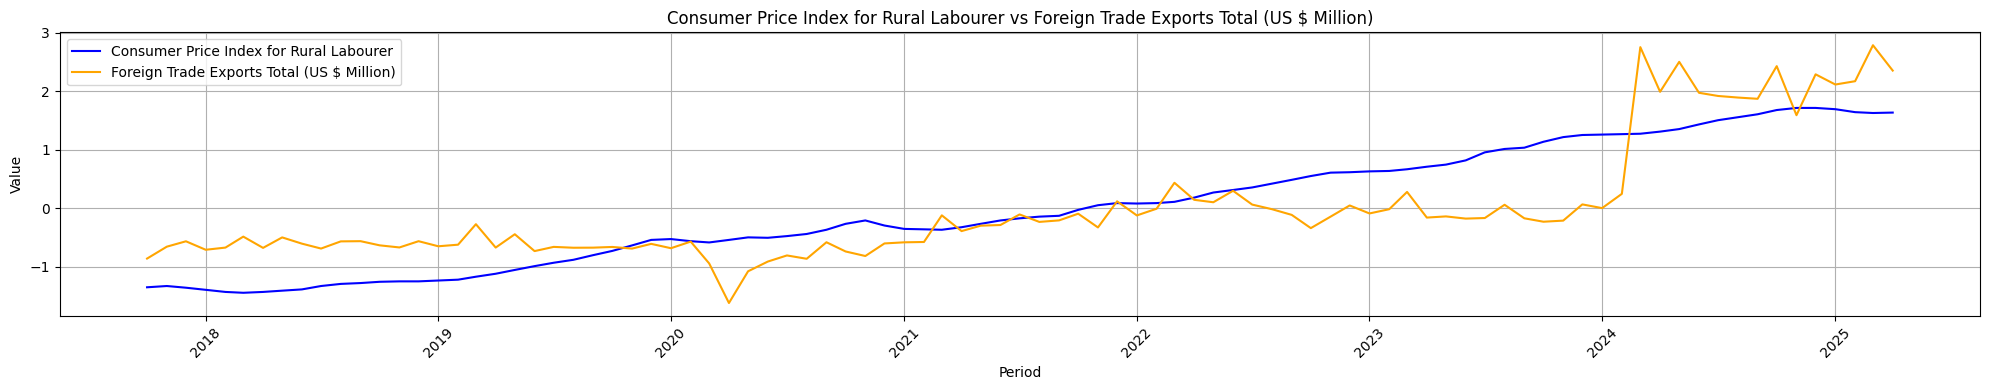

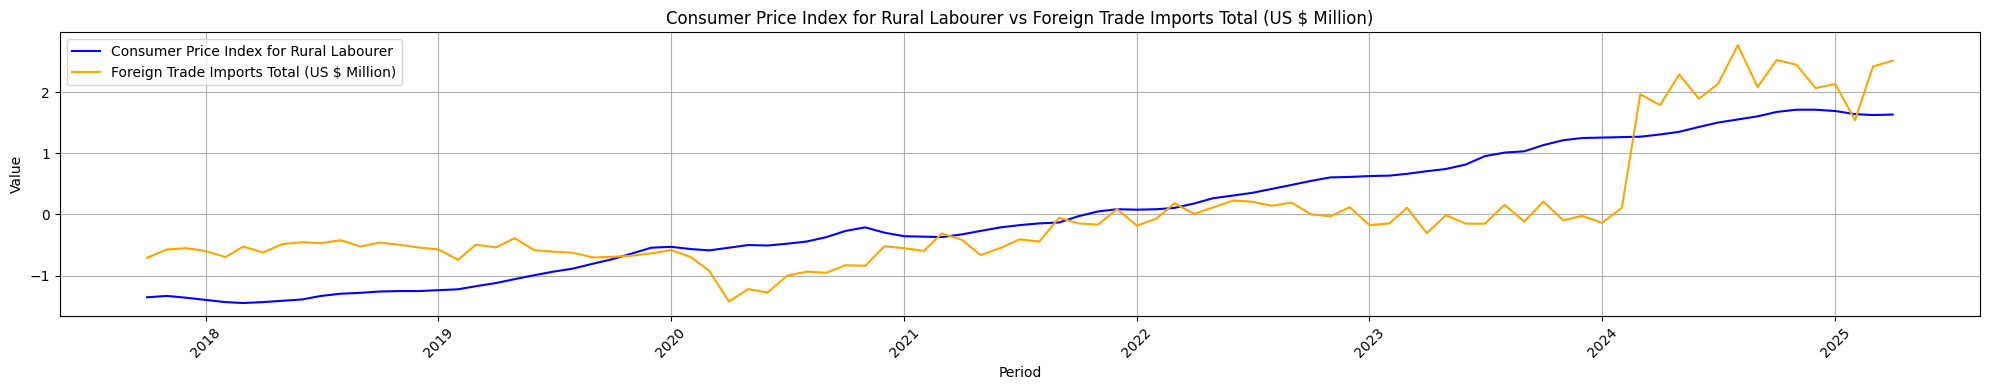

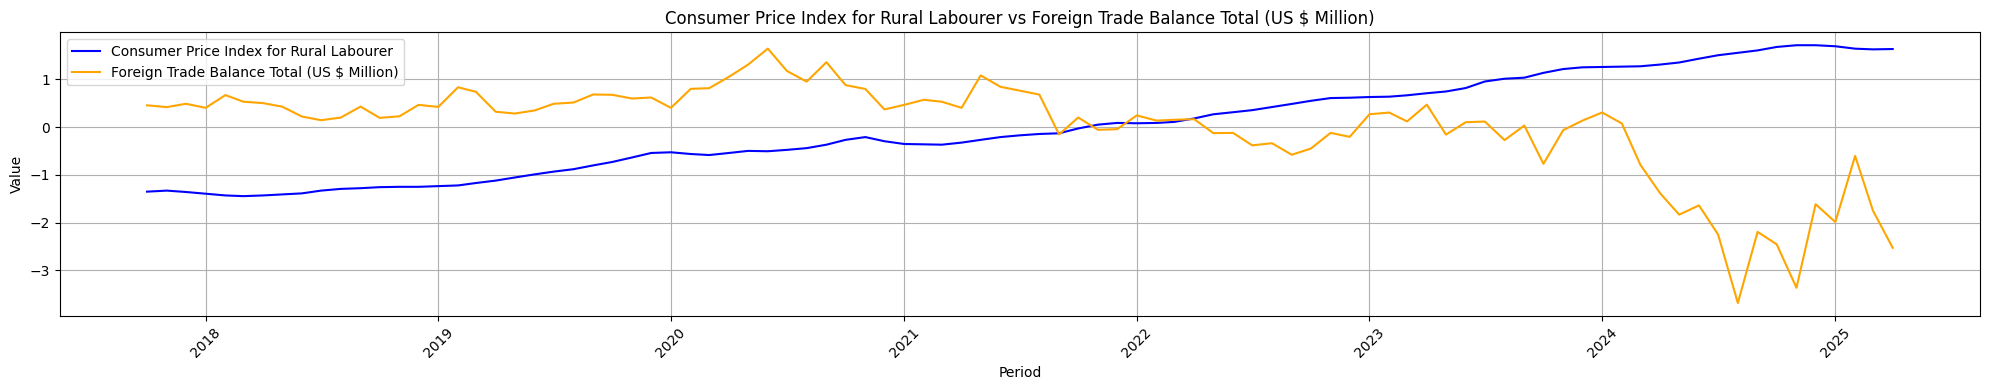

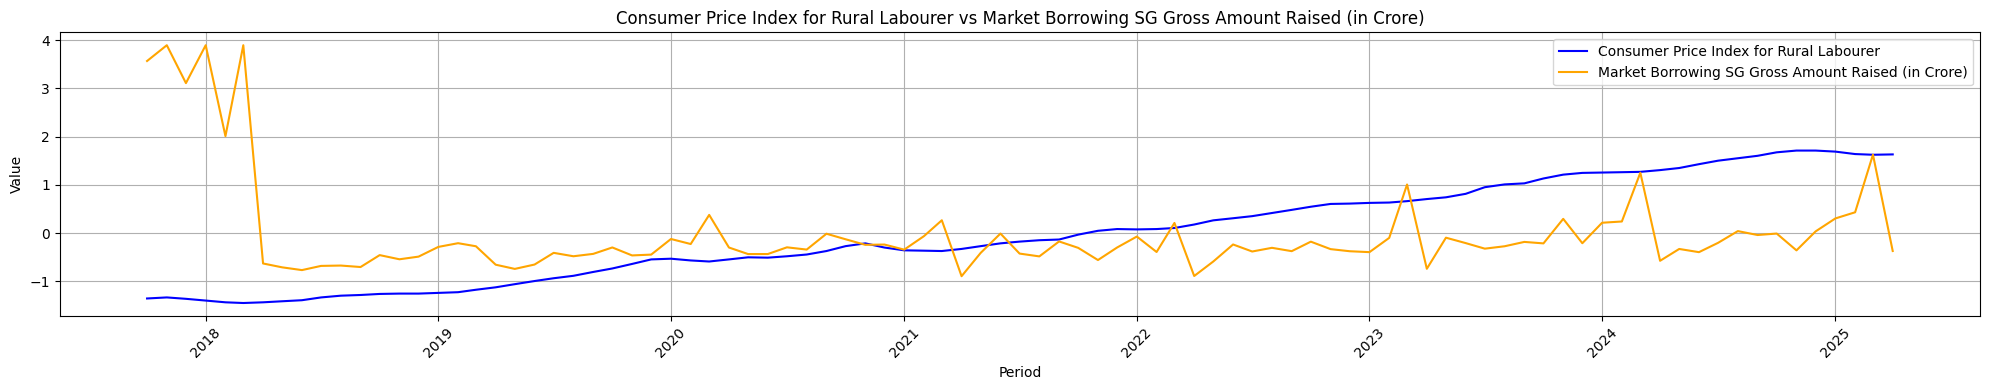

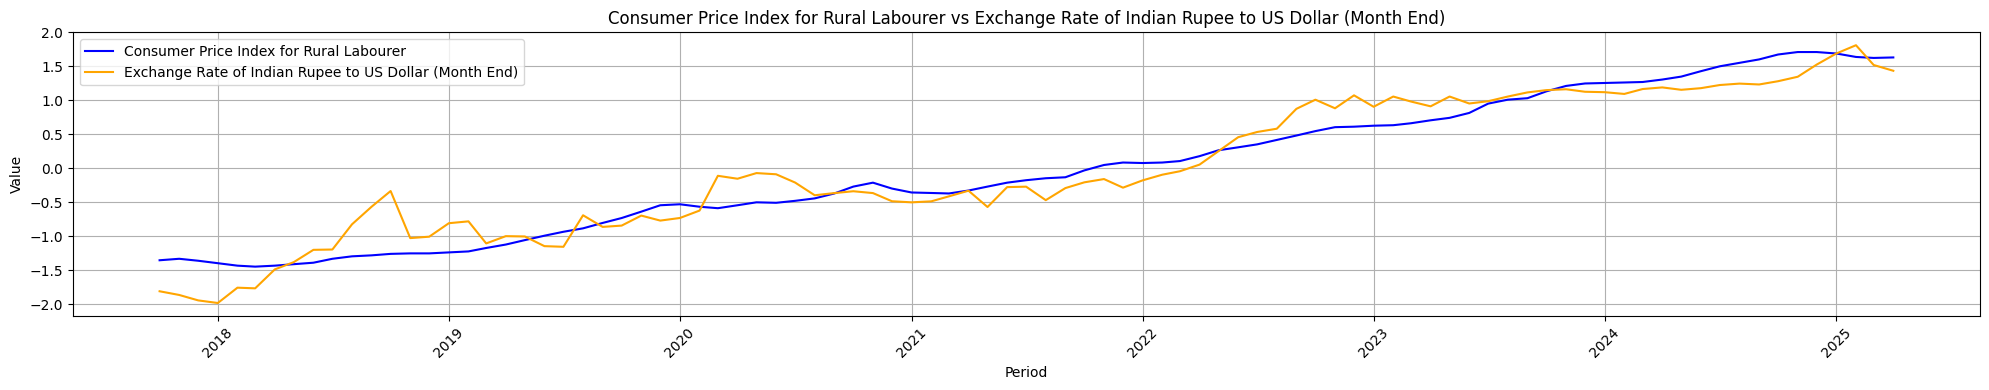

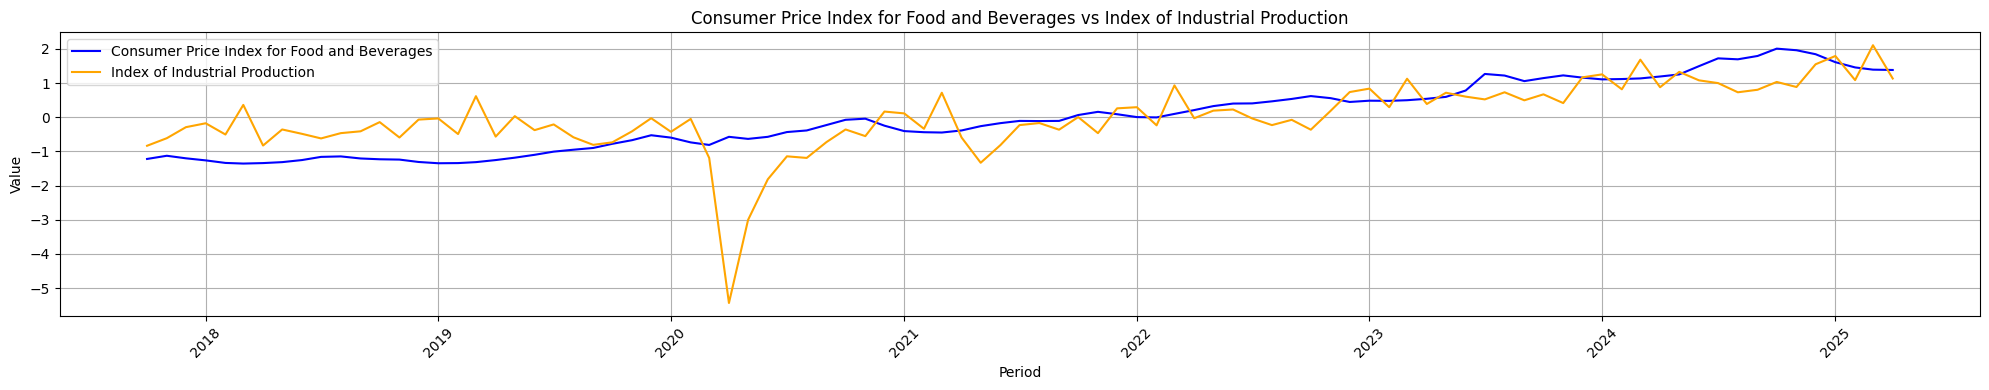

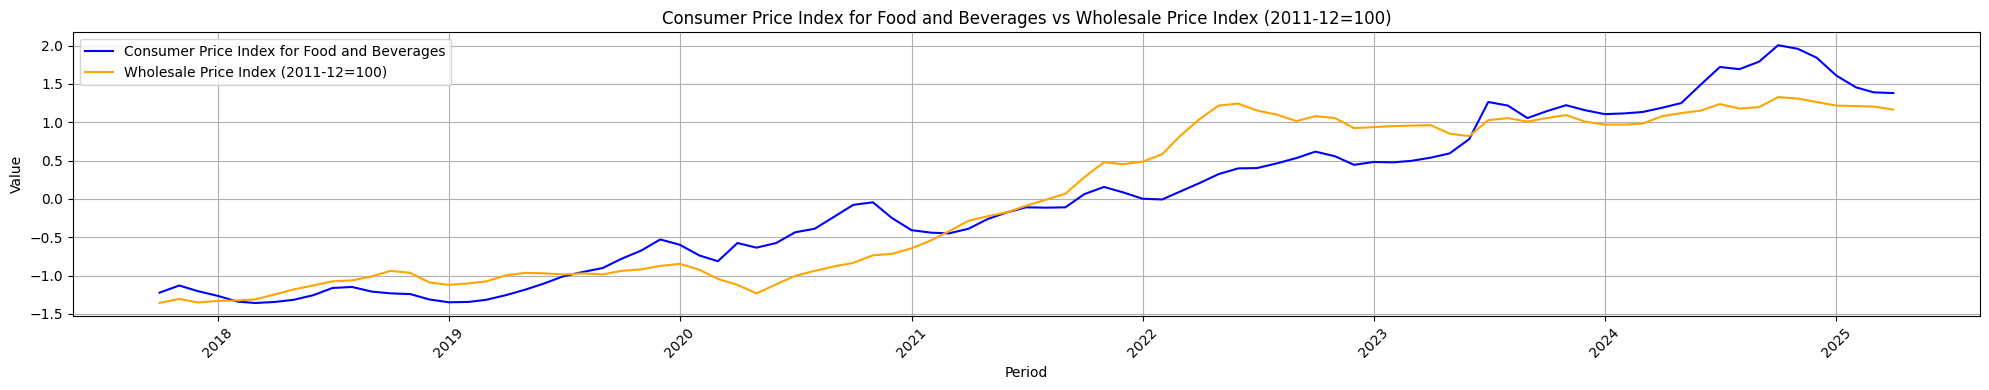

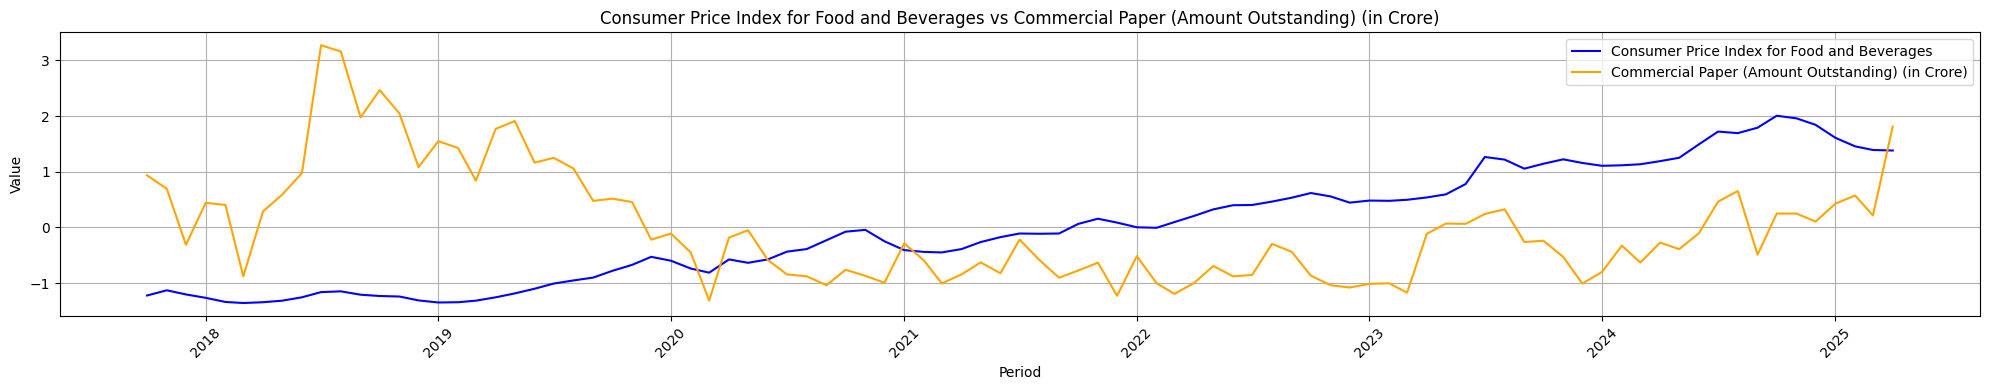

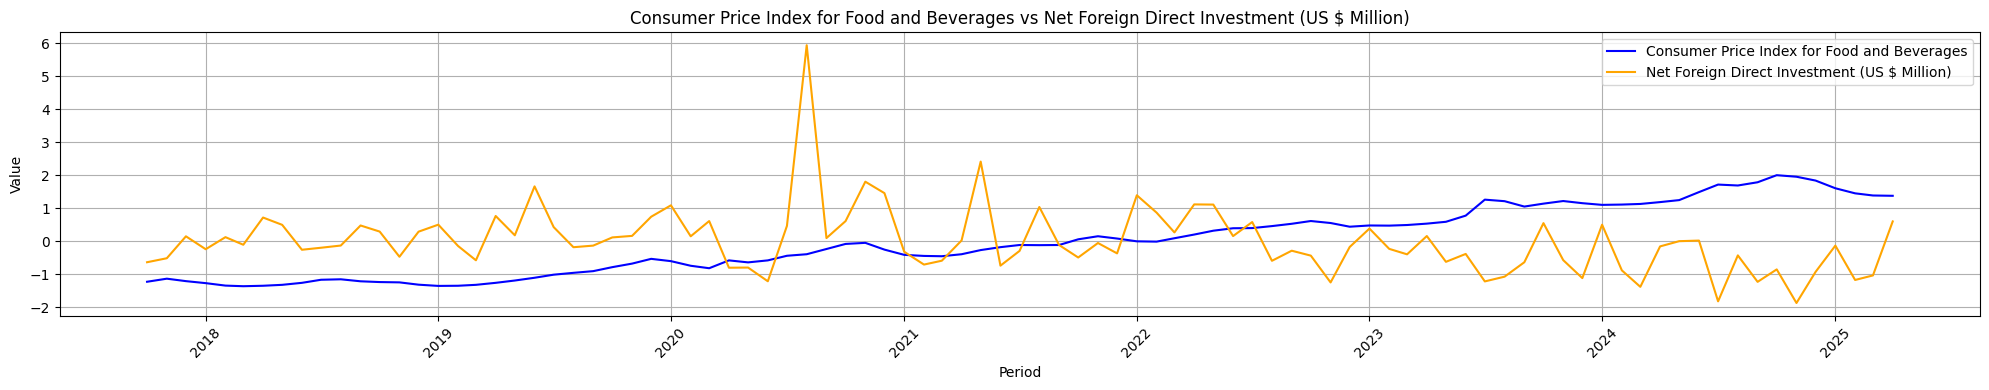

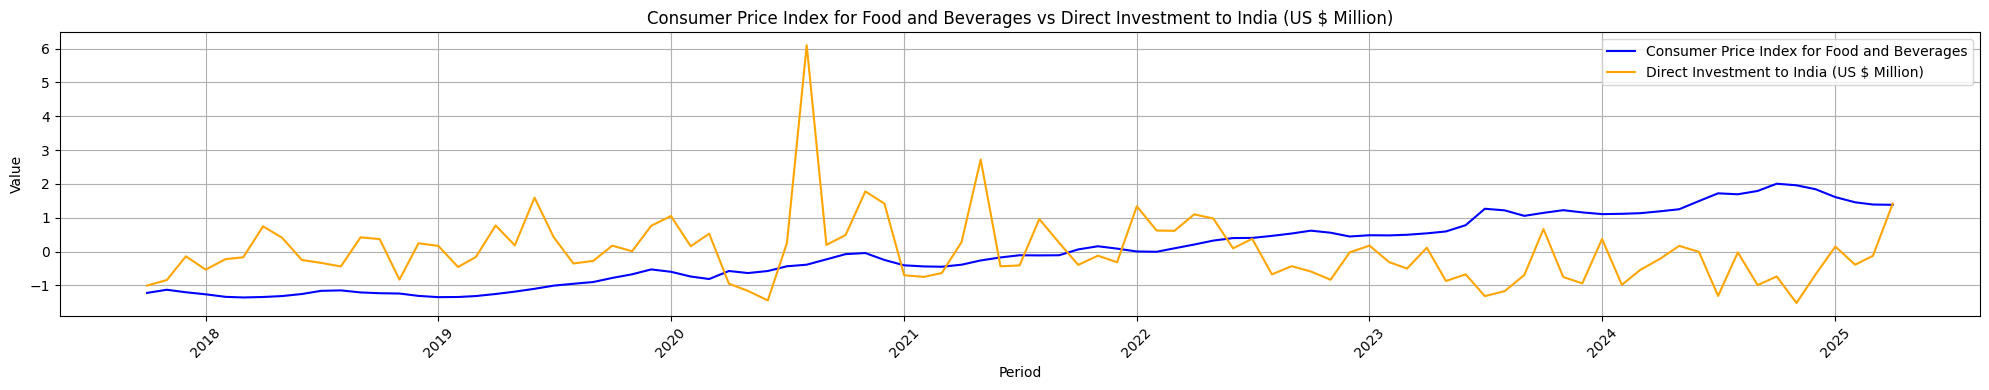

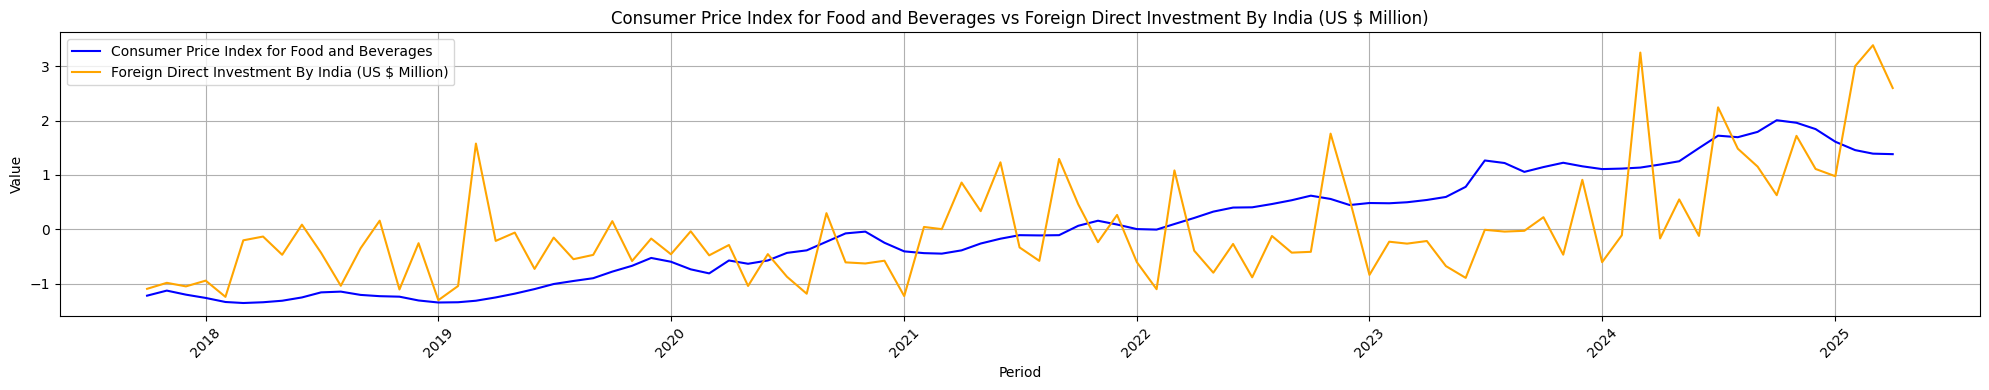

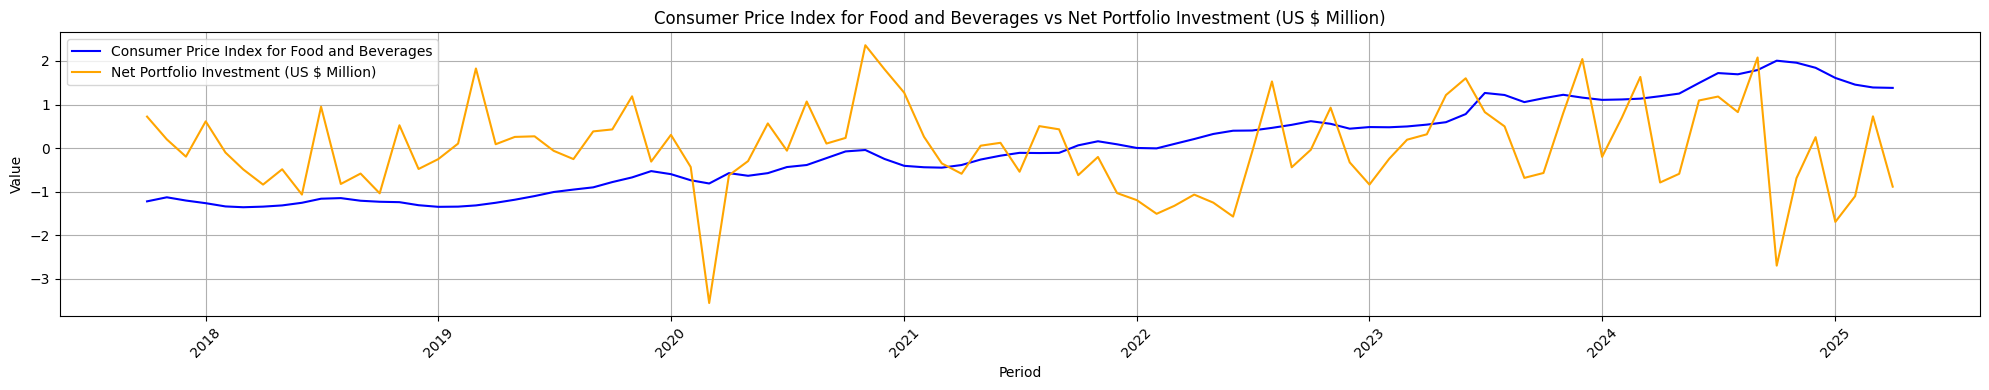

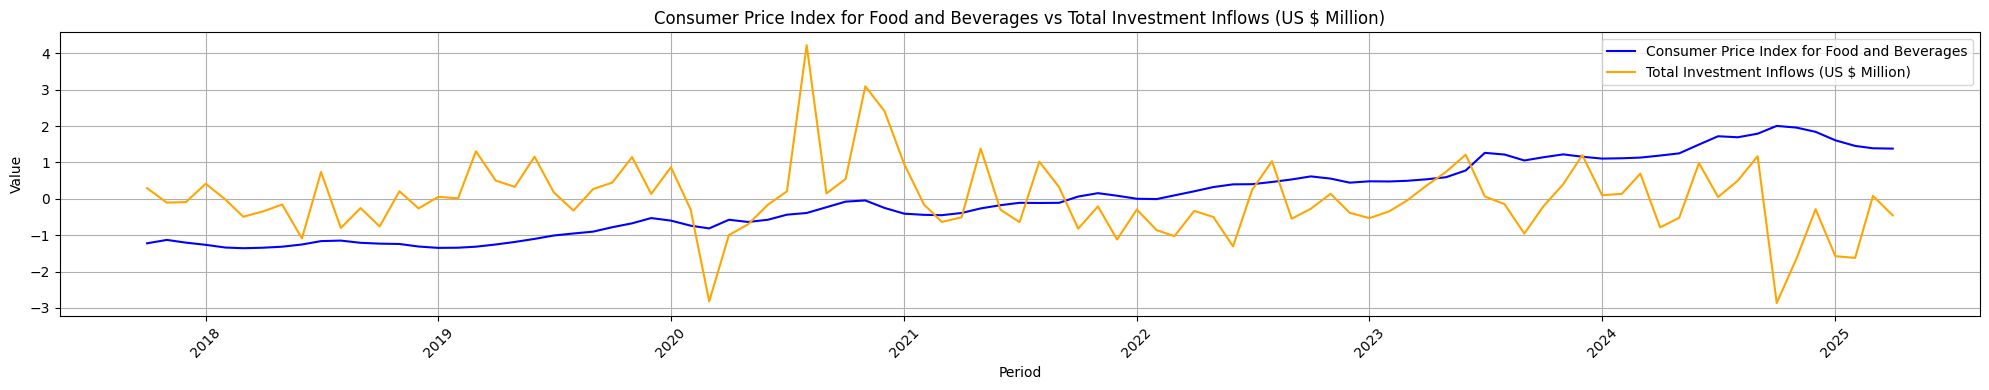

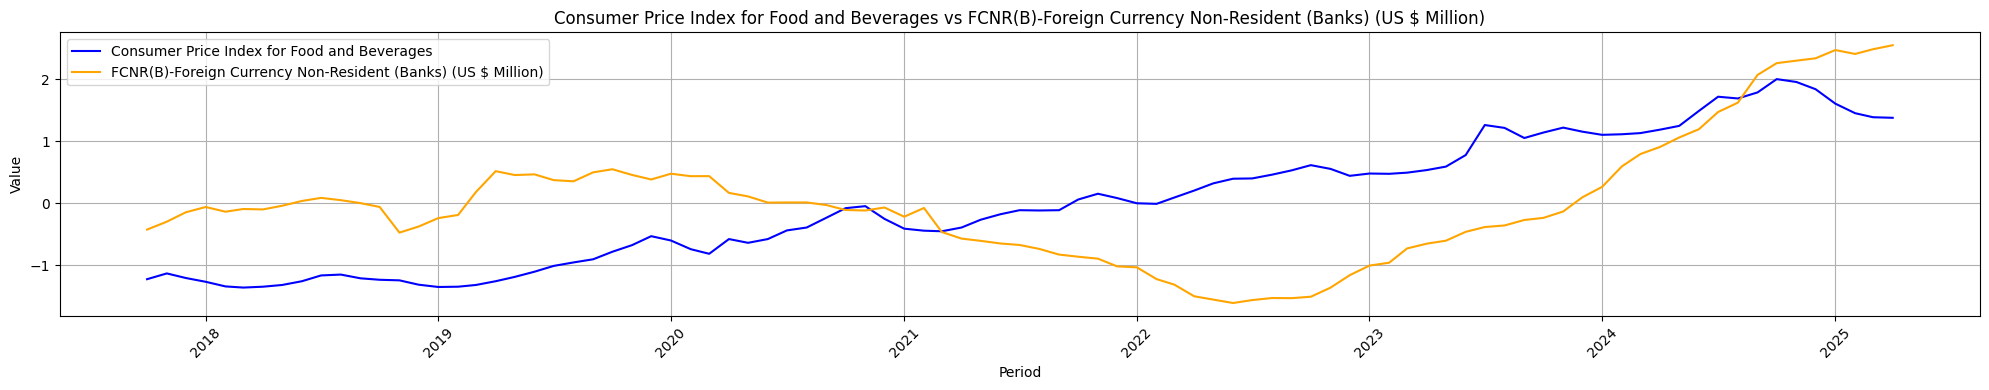

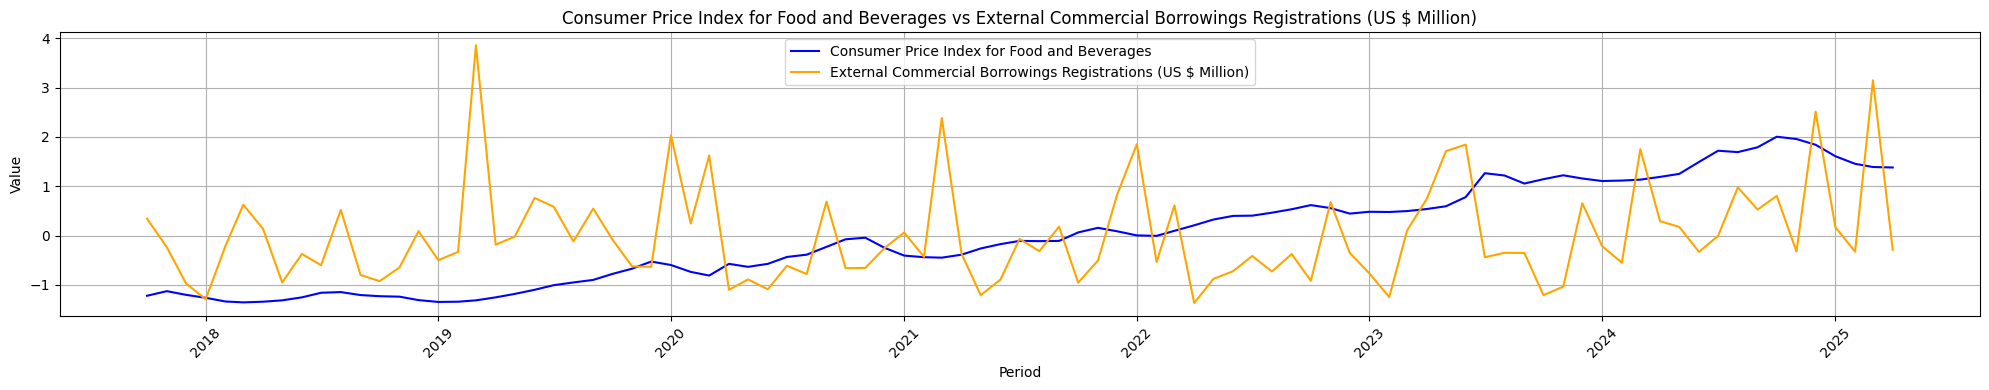

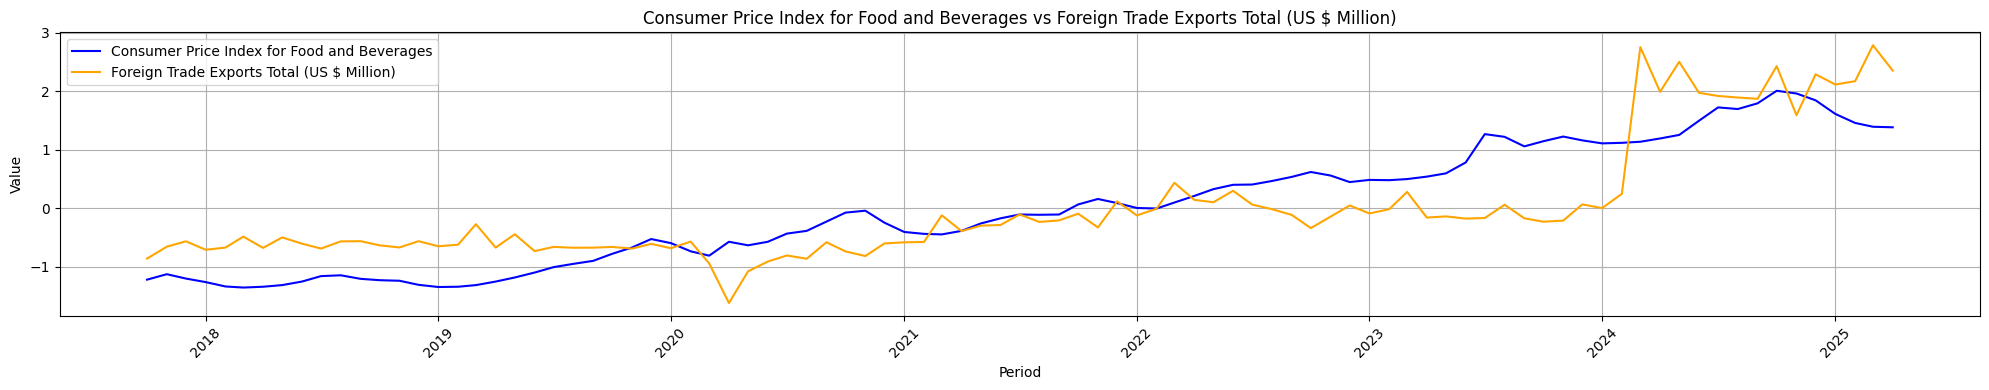

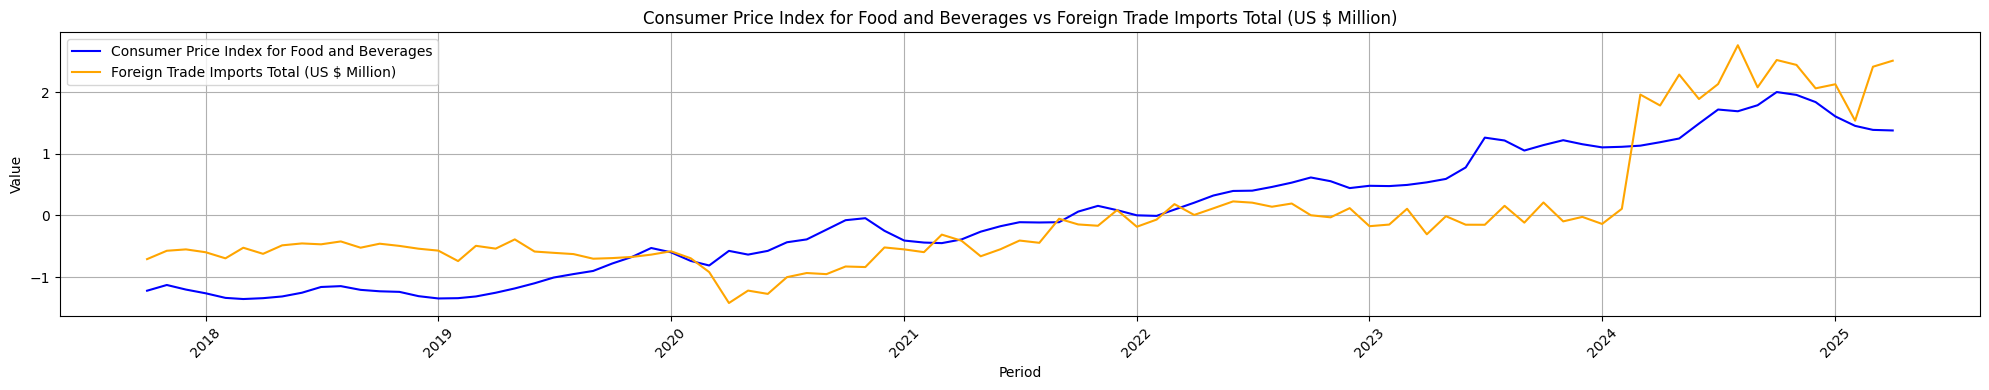

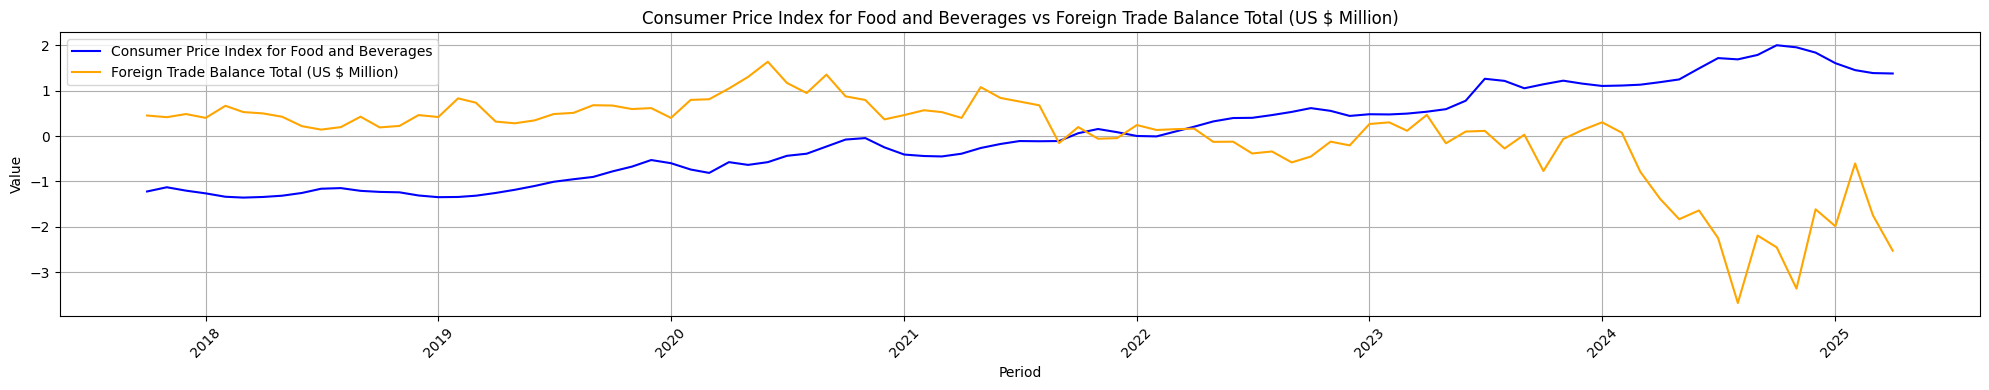

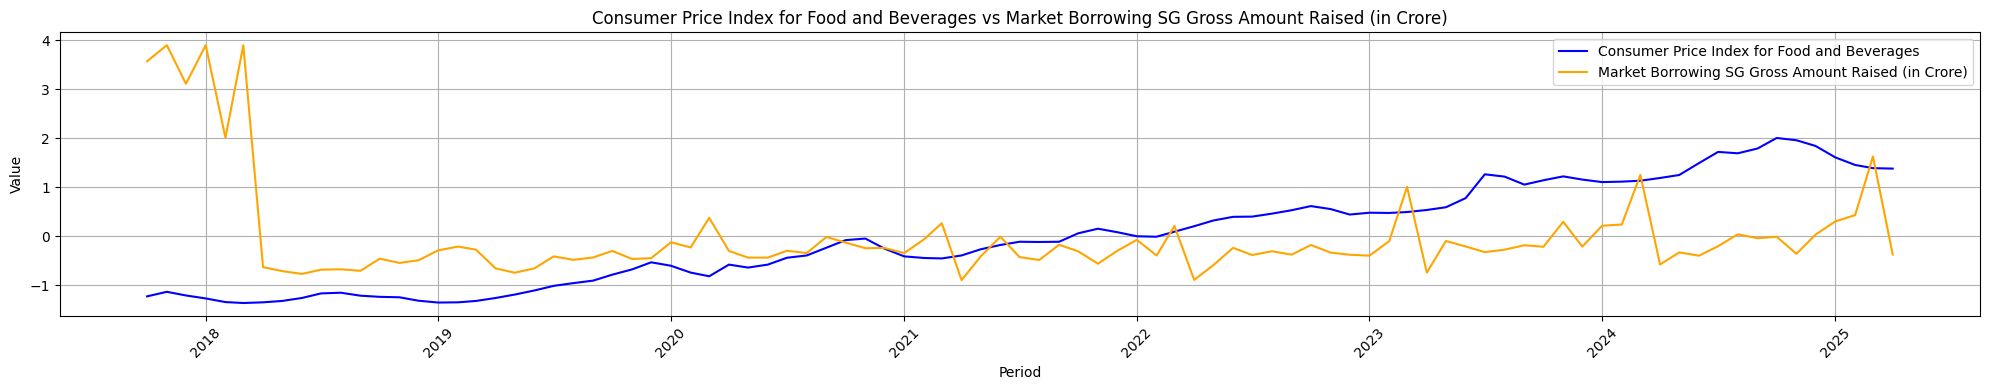

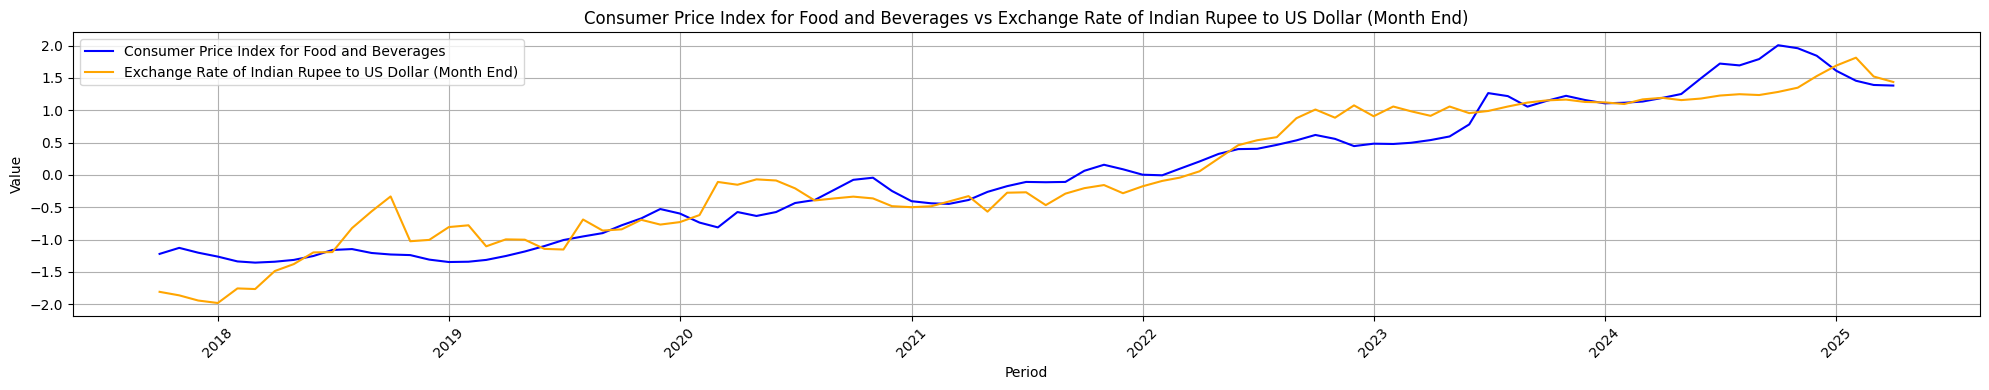

In [7]:
targets = [
    'Consumer Price Index  (2012=100)',
    'Consumer Price Index for Agricultural Labourer',
    'Consumer Price Index for Rural Labourer',
    'Consumer Price Index for Food and Beverages'
]

for target in targets:
    for col in scaled_df.columns:
        if col not in targets:
            plt.figure(figsize=(20, 4))
            plt.plot(scaled_df.index, scaled_df[target], label=target, color='blue')
            plt.plot(scaled_df.index, scaled_df[col], label=col, color='orange')
            plt.title(f'{target} vs {col}')
            plt.xlabel('Period')
            plt.ylabel('Value')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

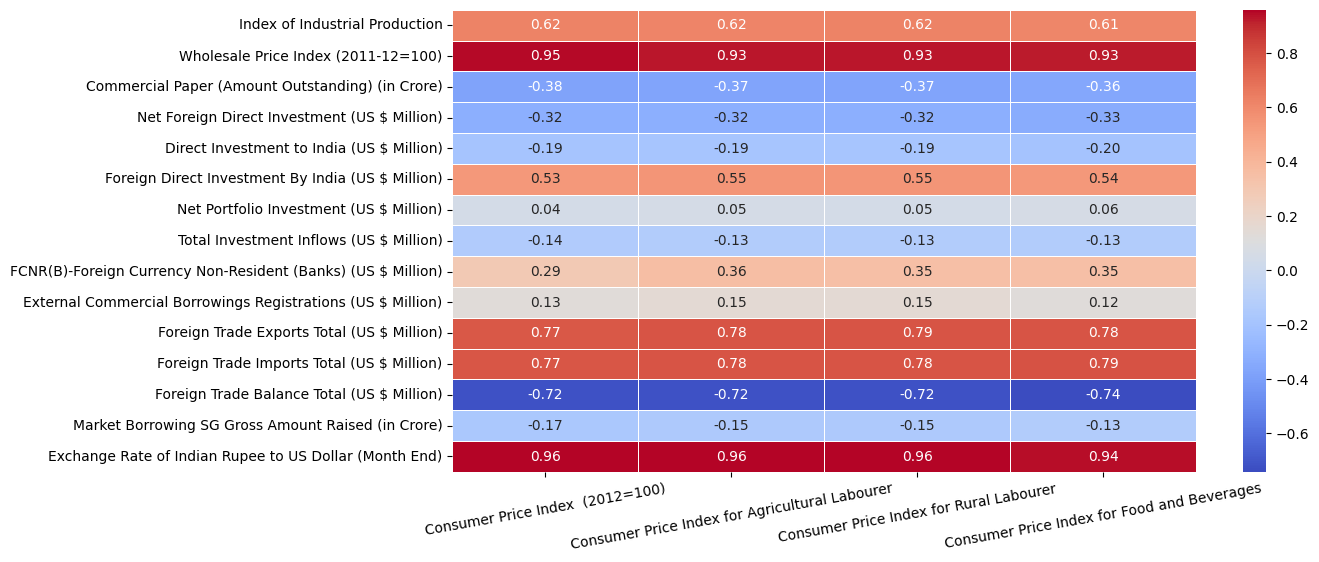

In [8]:
corr_matrix = df.corr()
target_corr = corr_matrix.loc[[col for col in corr_matrix.index if col not in targets], targets]

plt.figure(figsize=(12, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=10)
plt.show()

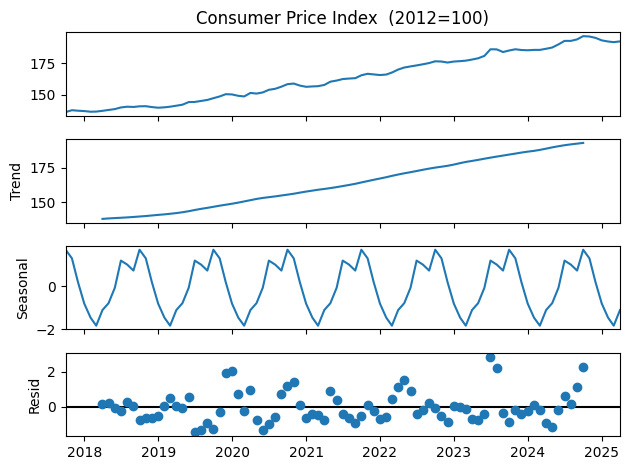

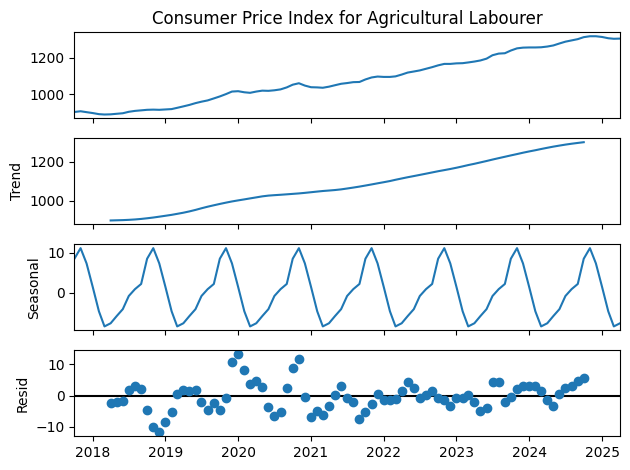

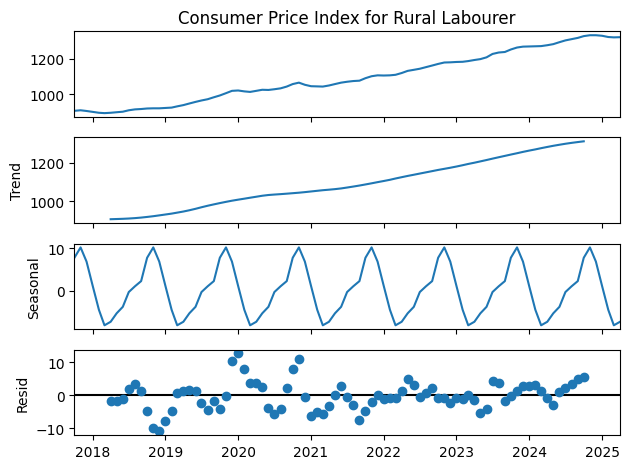

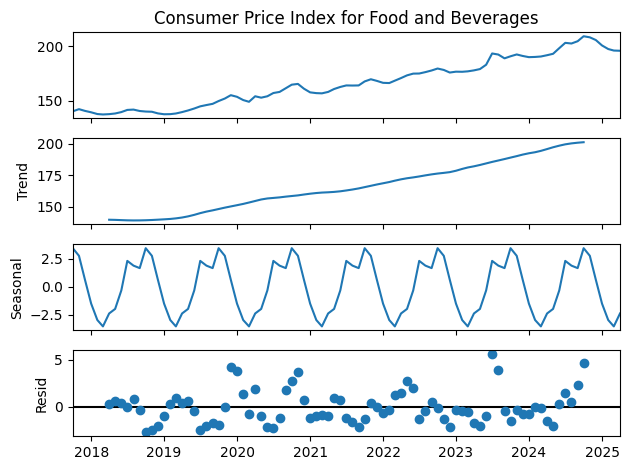

In [9]:
for target in targets:
    result = seasonal_decompose(df[target], model='additive', period=12)
    result.plot()
    plt.tight_layout()
    plt.show()

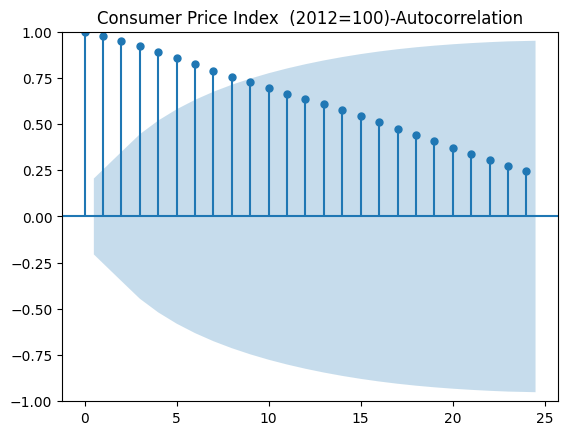

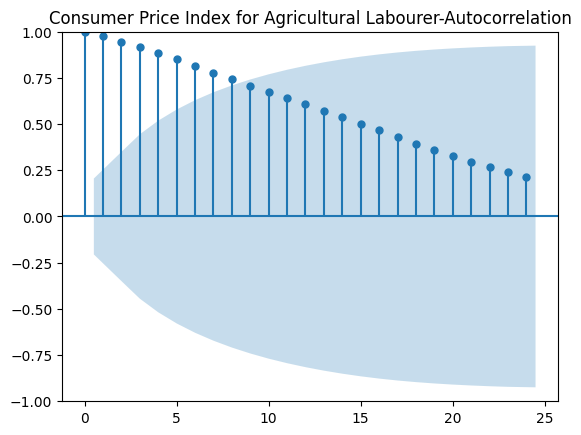

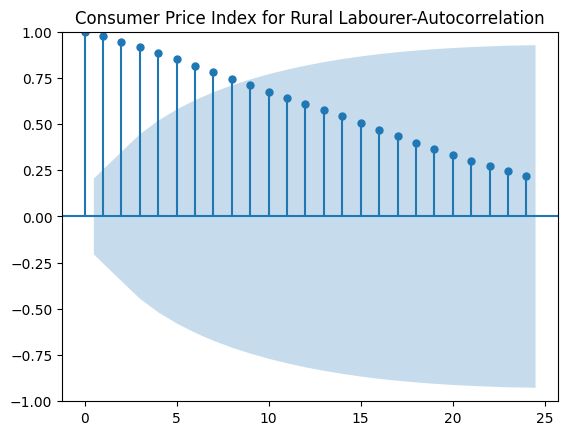

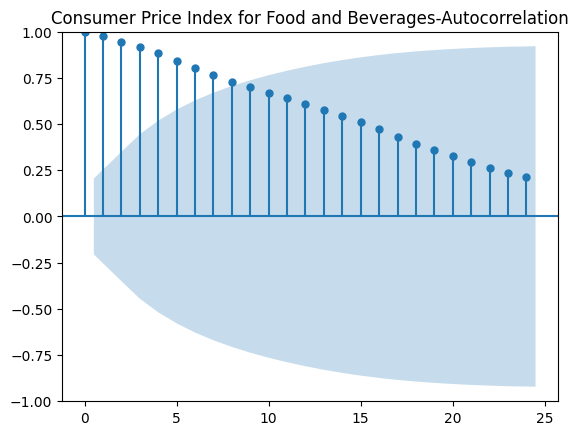

In [10]:
for target in targets:
    plot_acf(df[target], lags=24)
    plt.title(f"{target}-Autocorrelation")
    plt.show()

In [11]:
df1 = df.copy()

In [12]:
def rolling_mean_calculator(data, column, window):
    return data[column].rolling(window=window).mean()

cols = [
    'Commercial Paper (Amount Outstanding) (in Crore)',
    'Direct Investment to India (US $ Million)',
    'Foreign Direct Investment By India (US $ Million)',
    'Net Portfolio Investment (US $ Million)',
    'Total Investment Inflows (US $ Million)',
    'External Commercial Borrowings Registrations (US $ Million)'
]
for col in cols:
    df1[f'rolling_mean_{col}'] = rolling_mean_calculator(df1, column=col, window=6)


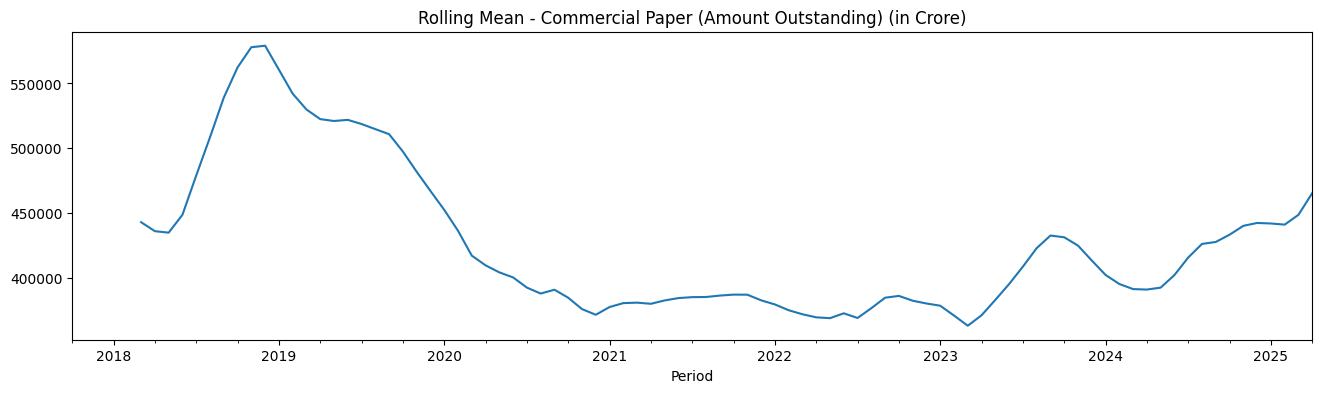

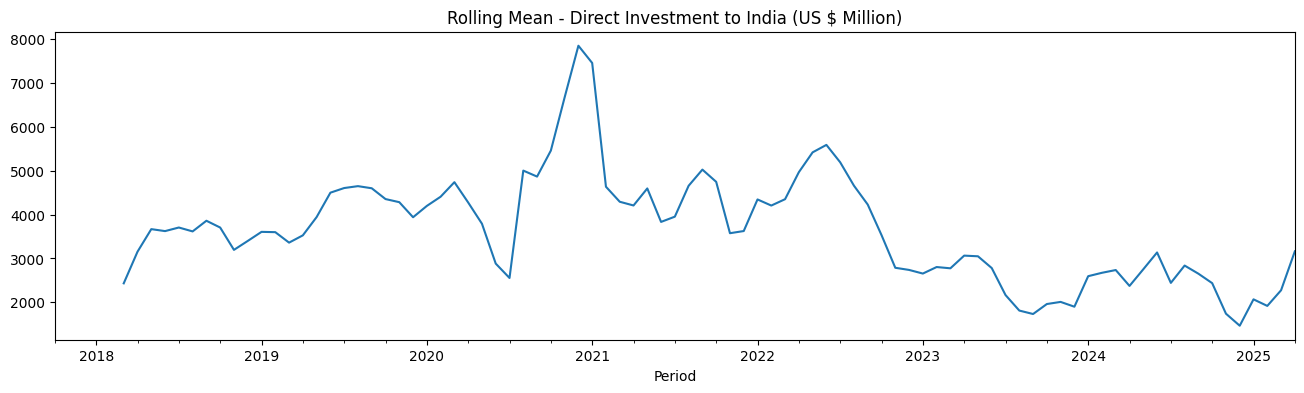

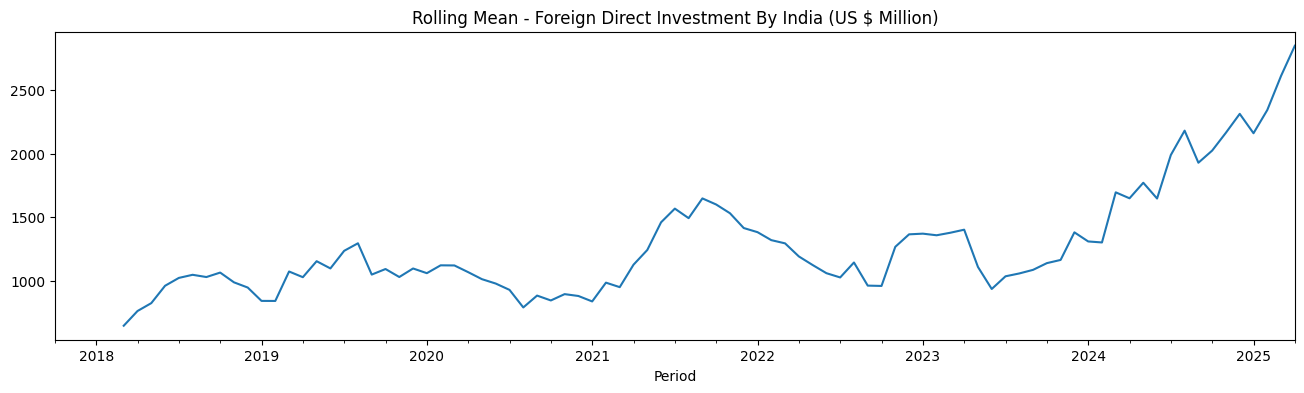

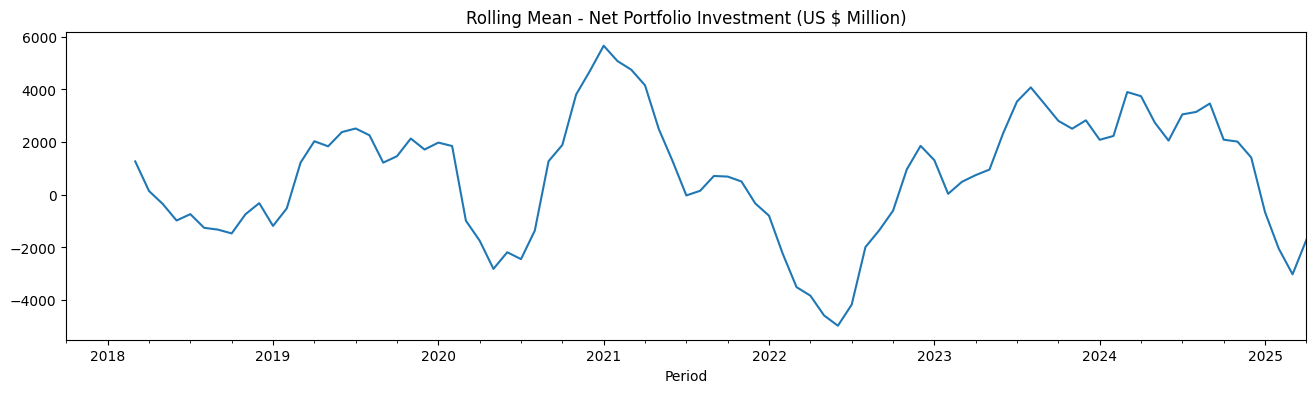

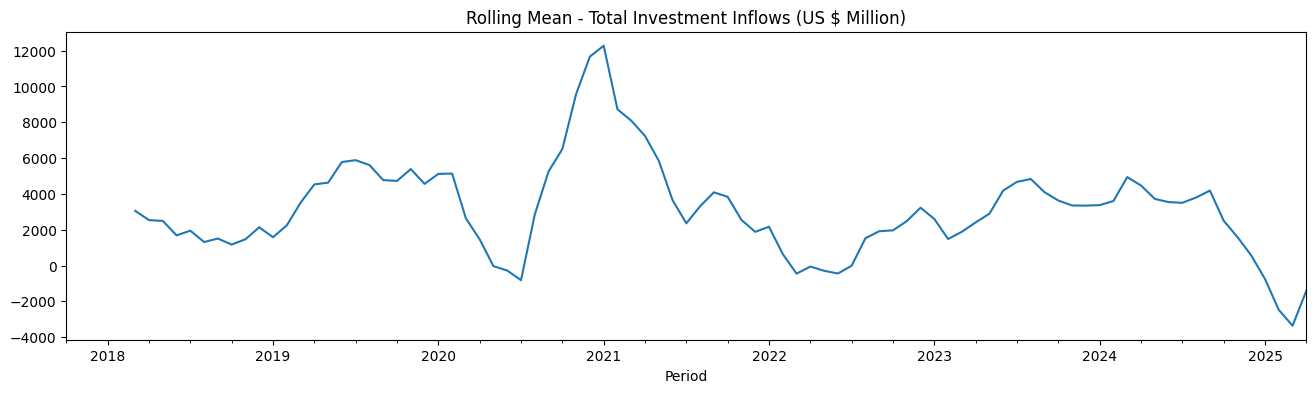

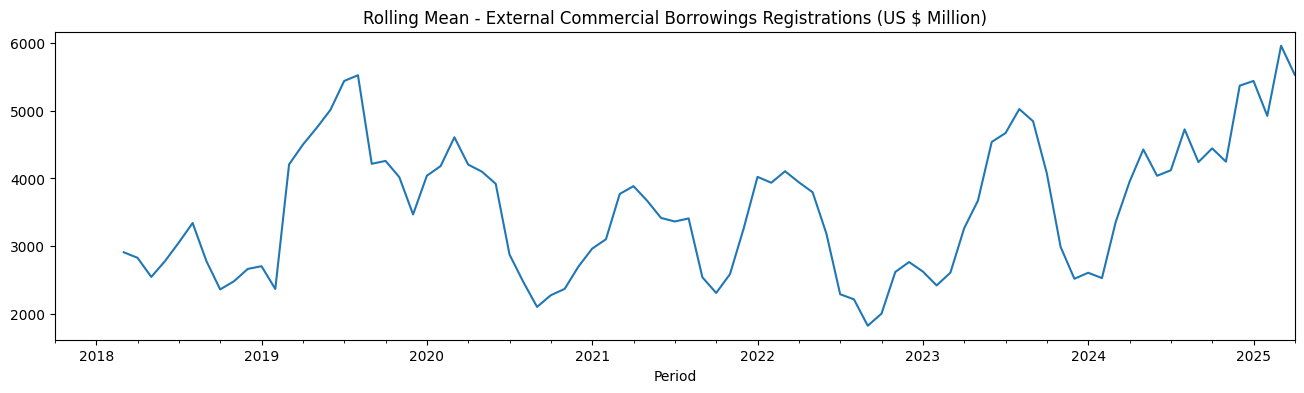

In [13]:
for col in cols:
    df1[f'rolling_mean_{col}'].plot(kind='line', figsize=(16, 4), title=f'Rolling Mean - {col}')
    plt.show()

In [14]:
for col in cols:
    print(f'Correlation befor rolling mean: {df1['Consumer Price Index  (2012=100)'].corr(df1[col])}')
    print(f'Correlation of rolling_mean_{col}: {df1['Consumer Price Index  (2012=100)'].corr(df1[f'rolling_mean_{col}'])}\n')

Correlation befor rolling mean: -0.3790178755740898
Correlation of rolling_mean_Commercial Paper (Amount Outstanding) (in Crore): -0.5064684689517812

Correlation befor rolling mean: -0.19006400497928957
Correlation of rolling_mean_Direct Investment to India (US $ Million): -0.4891304492559229

Correlation befor rolling mean: 0.5349748455449108
Correlation of rolling_mean_Foreign Direct Investment By India (US $ Million): 0.6950333806389586

Correlation befor rolling mean: 0.04277998723085943
Correlation of rolling_mean_Net Portfolio Investment (US $ Million): 0.15146768082017129

Correlation befor rolling mean: -0.13811036016108716
Correlation of rolling_mean_Total Investment Inflows (US $ Million): -0.20454832986291954

Correlation befor rolling mean: 0.12990330162255578
Correlation of rolling_mean_External Commercial Borrowings Registrations (US $ Million): 0.24471715285338724



In [15]:
df1.isnull().sum()

Consumer Price Index  (2012=100)                                            0
Index of Industrial Production                                              0
Wholesale Price Index (2011-12=100)                                         0
Consumer Price Index for Agricultural Labourer                              0
Consumer Price Index for Rural Labourer                                     0
Commercial Paper (Amount Outstanding) (in Crore)                            0
Consumer Price Index for Food and Beverages                                 0
Net Foreign Direct Investment (US $ Million)                                0
Direct Investment to India (US $ Million)                                   0
Foreign Direct Investment By India (US $ Million)                           0
Net Portfolio Investment (US $ Million)                                     0
Total Investment Inflows (US $ Million)                                     0
FCNR(B)-Foreign Currency Non-Resident (Banks) (US $ Million)    

In [16]:
df1 = df1.dropna()

In [17]:
def lagged_corr(df, feature, target, max_lag=12):
    correlations = {}
    for lag in range(1, max_lag + 1):
        shifted = df[feature].shift(lag)
        corr = df[target].corr(shifted)
        correlations[f"lag_{lag}"] = corr
    return correlations

In [18]:
df1.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Consumer Price Index  (2012=100)', 'Index of Industrial Production',
       'Wholesale Price Index (2011-12=100)',
       'Consumer Price Index for Agricultural Labourer',
       'Consumer Price Index for Rural Labourer',
       'Commercial Paper (Amount Outstanding) (in Crore)',
       'Consumer Price Index for Food and Beverages',
       'Net Foreign Direct Investment (US $ Million)',
       'Direct Investment to India (US $ Million)',
       'Foreign Direct Investment By India (US $ Million)',
       'Net Portfolio Investment (US $ Million)',
       'Total Investment Inflows (US $ Million)',
       'FCNR(B)-Foreign Currency Non-Resident (Banks) (US $ Million)',
       'External Commercial Borrowings Registrations (US $ Million)',
       'Foreign Trade Exports Total (US $ Million)',
       'Foreign Trade Imports Total (US $ Million)',
       'Foreign Trade Balance Total (US $ Million)',
       'Market Borrowing SG Gross Amount Raised (in 

In [19]:
columns = [
    'Index of Industrial Production',
    'Wholesale Price Index (2011-12=100)',
    'rolling_mean_Commercial Paper (Amount Outstanding) (in Crore)',
    'Net Foreign Direct Investment (US $ Million)',
    'rolling_mean_Direct Investment to India (US $ Million)',
    'rolling_mean_Foreign Direct Investment By India (US $ Million)',
    'rolling_mean_Net Portfolio Investment (US $ Million)',
    'rolling_mean_Total Investment Inflows (US $ Million)',
    'FCNR(B)-Foreign Currency Non-Resident (Banks) (US $ Million)',
    'rolling_mean_External Commercial Borrowings Registrations (US $ Million)',
    'Foreign Trade Exports Total (US $ Million)',
    'Foreign Trade Imports Total (US $ Million)',
    'Foreign Trade Balance Total (US $ Million)',
    'Market Borrowing SG Gross Amount Raised (in Crore)',
    'Exchange Rate of Indian Rupee to US Dollar (Month End)'
]

for col in columns:
    grangercausalitytests(df1[['Consumer Price Index  (2012=100)', col]], maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0741  , p=0.7862  , df_denom=82, df_num=1
ssr based chi2 test:   chi2=0.0768  , p=0.7817  , df=1
likelihood ratio test: chi2=0.0768  , p=0.7817  , df=1
parameter F test:         F=0.0741  , p=0.7862  , df_denom=82, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4417  , p=0.6445  , df_denom=79, df_num=2
ssr based chi2 test:   chi2=0.9393  , p=0.6252  , df=2
likelihood ratio test: chi2=0.9340  , p=0.6269  , df=2
parameter F test:         F=0.4417  , p=0.6445  , df_denom=79, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7682  , p=0.5153  , df_denom=76, df_num=3
ssr based chi2 test:   chi2=2.5170  , p=0.4722  , df=3
likelihood ratio test: chi2=2.4796  , p=0.4790  , df=3
parameter F test:         F=0.7682  , p=0.5153  , df_denom=76, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1075  , p=0.3596  , df_d

Granger Causality test shows that using lagged features will not be of great use

In [20]:
#based on the acf plots adding lagged CIP features
def create_lagged_features(df, target_columns, max_lag):
    for target in target_columns:
        for lag in range(1, max_lag + 1):
            df[f'{target}_lag_{lag}'] = df[target].rolling(3).mean().shift(lag)
    return df

In [21]:
max_lag = 6
df1 = create_lagged_features(df1, targets, max_lag)
df1.head()

Consumer Price Index  (2012=100)  Index of Industrial Production  \
Period                                                                         
2018-03-01                             136.5                           140.3   
2018-04-01                             137.1                           122.6   
2018-05-01                             137.8                           129.6   
2018-06-01                             138.5                           127.7   
2018-07-01                             139.8                           125.7   

            Wholesale Price Index (2011-12=100)  \
Period                                            
2018-03-01                                116.3   
2018-04-01                                117.3   
2018-05-01                                118.3   
2018-06-01                                119.1   
2018-07-01                                119.9   

            Consumer Price Index for Agricultural Labourer  \
Period                                                       
2018-03-01                                           887.0   
2018-04-01                                           888.0   
2018-05-01                                           891.0   
2018-06-01                                           894.0   
2018-07-01                                           902.0   

            Consumer Price Index for Rural Labourer  \
Period                                                
2018-03-01                                    894.0   
2018-04-01                                    896.0   
2018-05-01                                    899.0   
2018-06-01                                    902.0   
2018-07-01                                    910.0   

            Commercial Paper (Amount Outstanding) (in Crore)  \
Period                                                         
2018-03-01                                         372577.41   
2018-04-01                                         447691.41   
2018-05-01                                         466886.96   
2018-06-01                                         491833.06   
2018-07-01                                         639529.66   

            Consumer Price Index for Food and Beverages  \
Period                                                    
2018-03-01                                        137.2   
2018-04-01                                        137.5   
2018-05-01                                        138.1   
2018-06-01                                        139.4   
2018-07-01                                        141.4   

            Net Foreign Direct Investment (US $ Million)  \
Period                                                     
2018-03-01                                       2051.24   
2018-04-01                                       4260.41   
2018-05-01                                       3667.54   
2018-06-01                                       1644.54   
2018-07-01                                       1808.50   

            Direct Investment to India (US $ Million)  \
Period                                                  
2018-03-01                                    3213.56   
2018-04-01                                    5473.06   
2018-05-01                                    4637.50   
2018-06-01                                    3015.49   
2018-07-01                                    2805.67   

            Foreign Direct Investment By India (US $ Million)  ...  \
Period                                                         ...   
2018-03-01                                            1162.31  ...   
2018-04-01                                            1212.65  ...   
2018-05-01                                             969.95  ...   
2018-06-01                                            1370.95  ...   
2018-07-01                                             997.17  ...   

            Consumer Price Index for Rural Labourer_lag_3  \
Period                              

In [22]:
df1.shape

(86, 49)

In [23]:
df1 = df1.dropna()
df1.head()

Consumer Price Index  (2012=100)  Index of Industrial Production  \
Period                                                                         
2018-11-01                             140.8                           126.1   
2018-12-01                             140.1                           133.9   
2019-01-01                             139.6                           134.4   
2019-02-01                             139.9                           127.6   
2019-03-01                             140.4                           144.1   

            Wholesale Price Index (2011-12=100)  \
Period                                            
2018-11-01                                121.6   
2018-12-01                                119.7   
2019-01-01                                119.2   
2019-02-01                                119.5   
2019-03-01                                119.9   

            Consumer Price Index for Agricultural Labourer  \
Period                                                       
2018-11-01                                           914.0   
2018-12-01                                           913.0   
2019-01-01                                           915.0   
2019-02-01                                           917.0   
2019-03-01                                           924.0   

            Consumer Price Index for Rural Labourer  \
Period                                                
2018-11-01                                    921.0   
2018-12-01                                    921.0   
2019-01-01                                    923.0   
2019-02-01                                    925.0   
2019-03-01                                    932.0   

            Commercial Paper (Amount Outstanding) (in Crore)  \
Period                                                         
2018-11-01                                         560613.81   
2018-12-01                                         498728.65   
2019-01-01                                         528741.20   
2019-02-01                                         520811.05   
2019-03-01                                         483084.45   

            Consumer Price Index for Food and Beverages  \
Period                                                    
2018-11-01                                        139.7   
2018-12-01                                        138.2   
2019-01-01                                        137.4   
2019-02-01                                        137.5   
2019-03-01                                        138.1   

            Net Foreign Direct Investment (US $ Million)  \
Period                                                     
2018-11-01                                       1076.61   
2018-12-01                                       3112.49   
2019-01-01                                       3681.52   
2019-02-01                                       1949.20   
2019-03-01                                        789.18   

            Direct Investment to India (US $ Million)  \
Period                                                  
2018-11-01                                    1584.78   
2018-12-01                                    4236.52   
2019-01-01                                    4046.86   
2019-02-01                                    2503.48   
2019-03-01                                    3239.58   

            Foreign Direct Investment By India (US $ Million)  ...  \
Period                                                         ...   
2018-11-01                                             508.17  ...   
2018-12-01                                            1124.02  ...   
2019-01-01                                             365.34  ...   
2019-02-01                                             554.28  ...   
2019-03-01                                            2450.40  ...   

            Consumer Price Index for Rural Labourer_lag_3  \
Period                              

In [24]:
df1.shape

(78, 49)

In [25]:
df1 = df1.drop([
	'Commercial Paper (Amount Outstanding) (in Crore)',
	'Direct Investment to India (US $ Million)',
	'Foreign Direct Investment By India (US $ Million)',
	'Net Portfolio Investment (US $ Million)',
	'Total Investment Inflows (US $ Million)',
	'External Commercial Borrowings Registrations (US $ Million)'
], axis=1, errors='ignore')

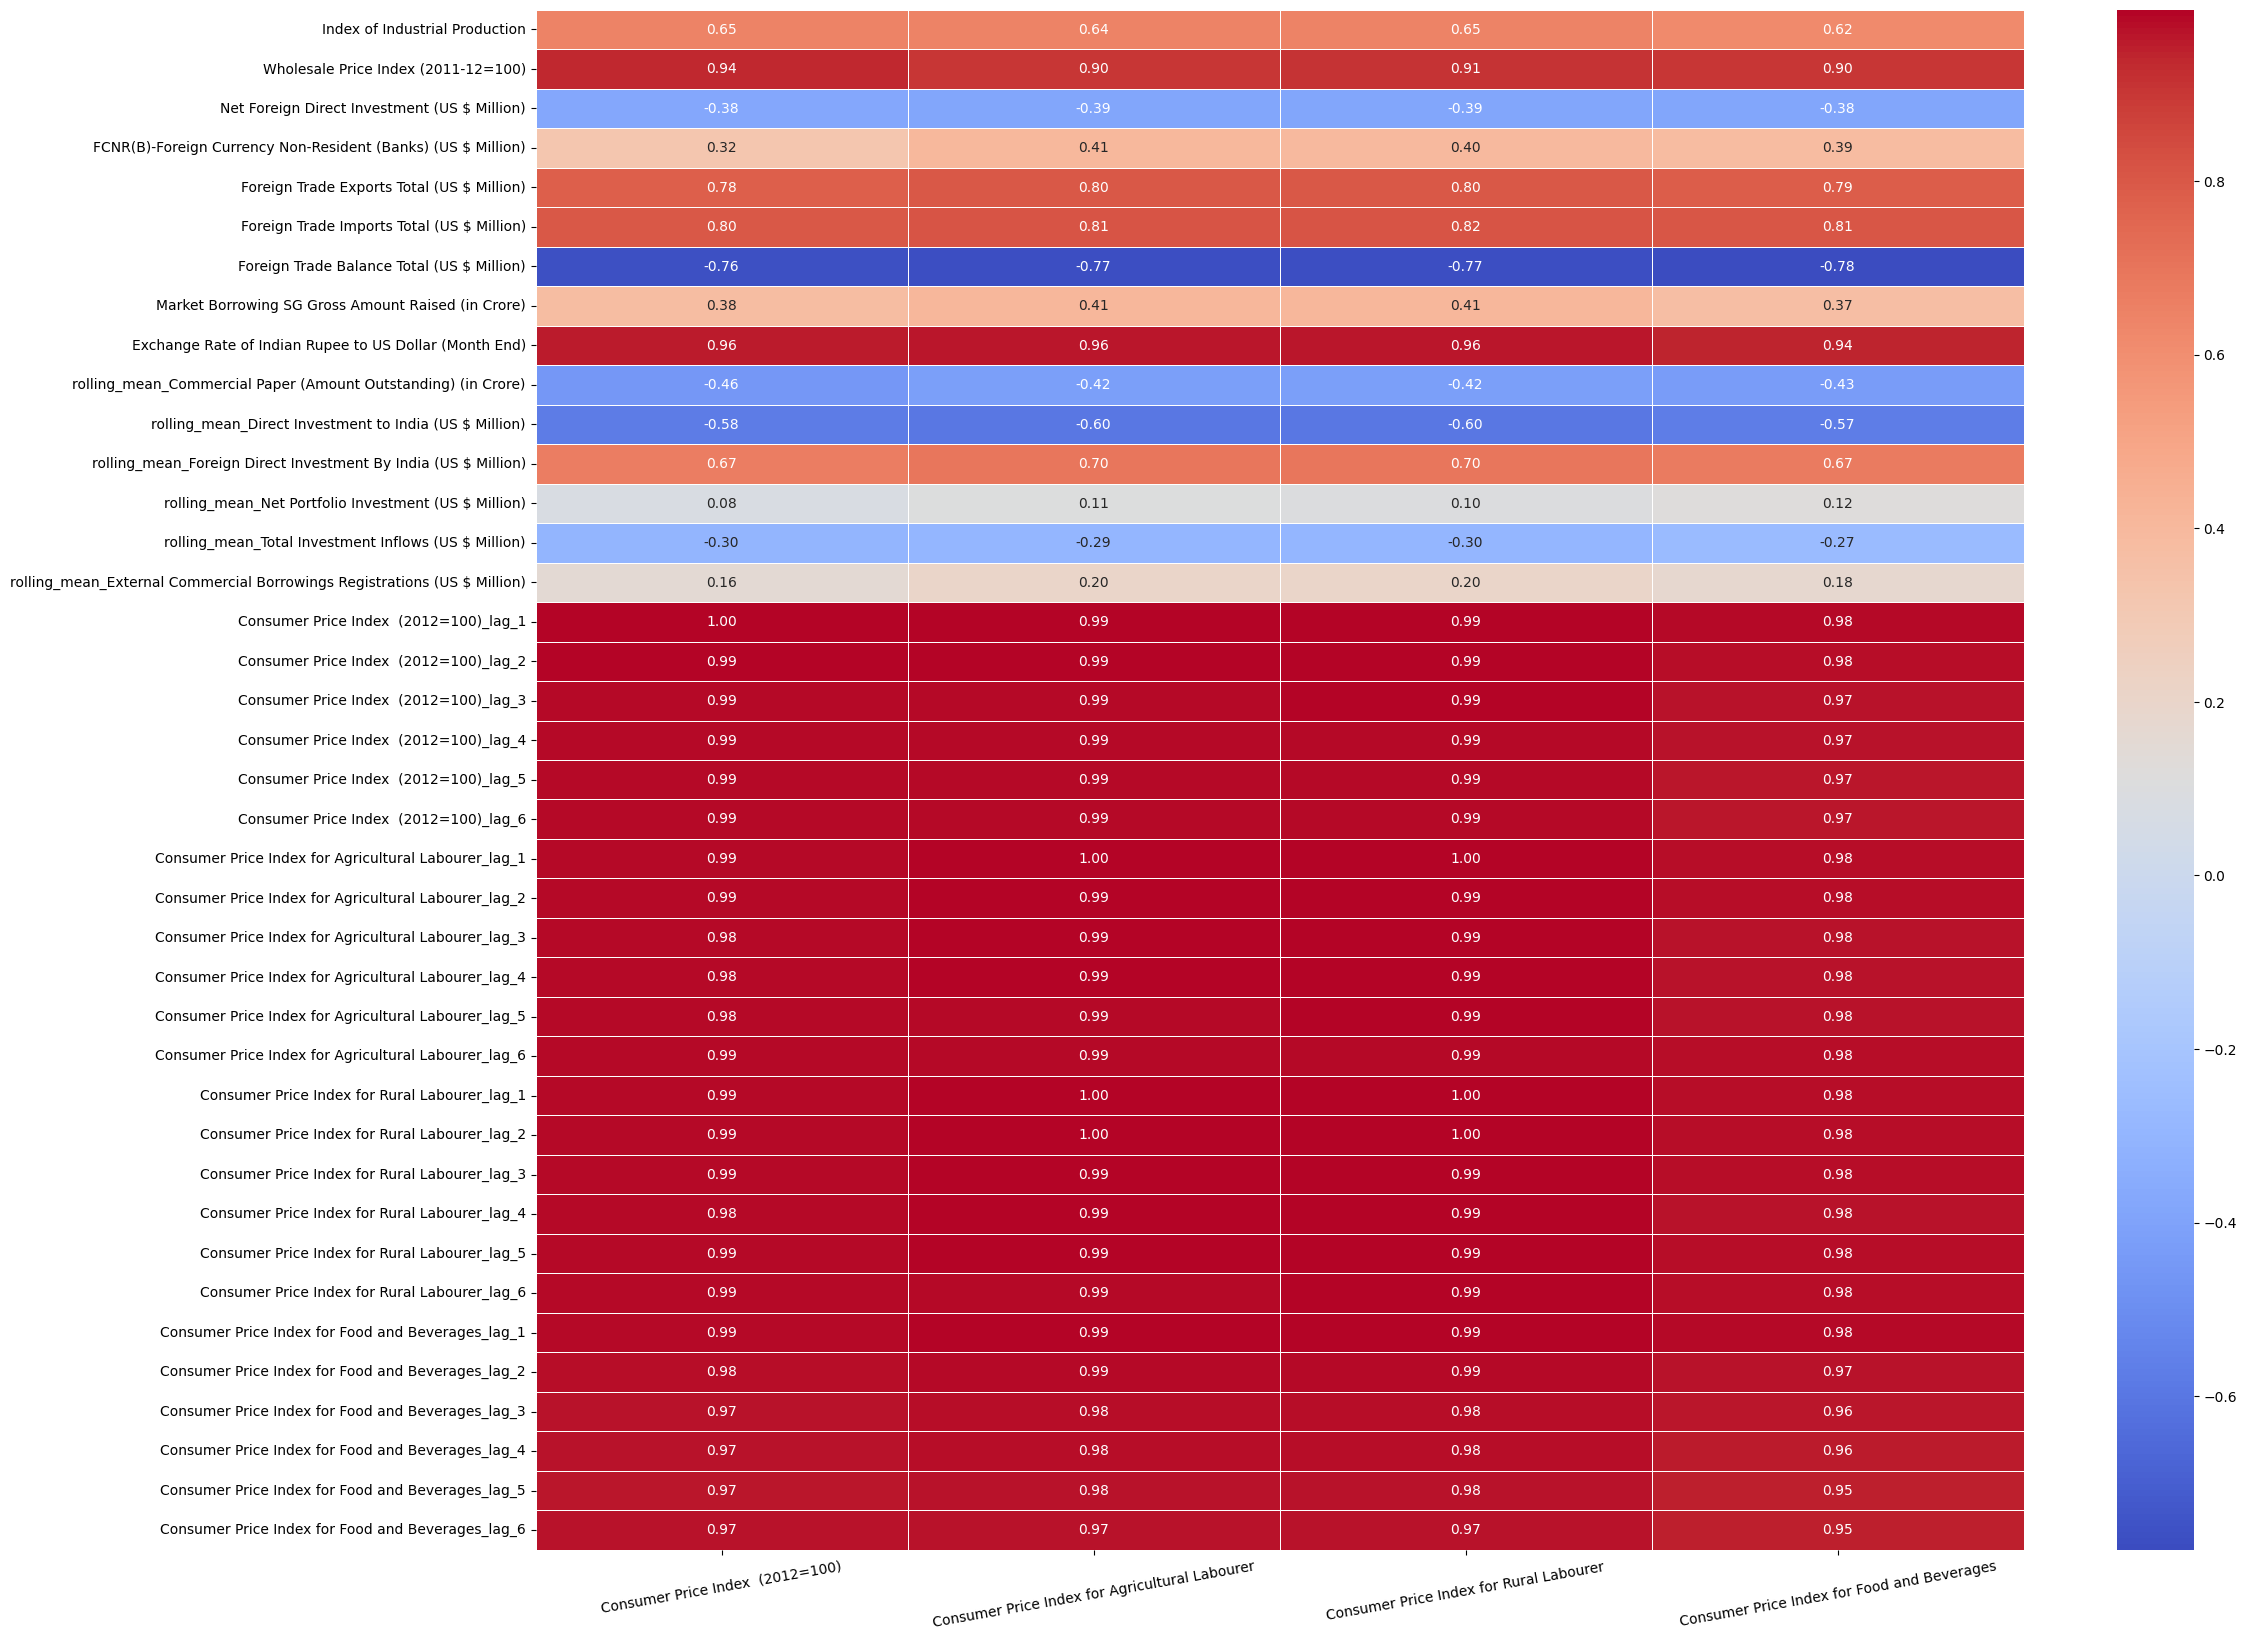

In [26]:
corr_matrix = df1.corr()
target_corr = corr_matrix.loc[[col for col in corr_matrix.index if col not in targets], targets]

plt.figure(figsize=(24, 20))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=10)
plt.show()

In [27]:
df1.to_csv('final.csv')